## <u>Part One - PROJECT BASED </u>

• <b>DOMAIN:</b> Automobile 

• <b>CONTEXT:</b> The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon,  to  be  predicted  in  terms  of  3  multivalued  discrete  and  5 continuous attributes.

• <b>DATA DESCRIPTION:</b> The data concerns city-cycle fuel consumption in miles per gallon. 

• Attribute Information: 
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) 

• <b>PROJECT OBJECTIVE:</b> Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’.

<b>Steps and tasks:</b>

<b>1.Import and warehouse data: </b>

• Import all the given datasets and explore shape and size.<br> 
• Merge all datasets onto one and explore final shape and size.<br> 
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.<br> 
• Import the data from above steps into python.<br> 

<b>2.Data cleansing: </b>

• Missing/incorrect value treatment<br> 
• Drop attribute/s if required using relevant functional knowledge<br> 
• Perform another kind of corrections/treatment on the data.<br> 

<b>3.Data analysis & visualisation: </b>

• Perform detailed statistical analysis on the data.<br> 
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. <br><b>Hint:</b>  Use  your  best  analytical  approach.  Even  you  can  mix  match  columns  to  create  new  columns  which  can  be  used  for  better  analysis.  Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

<b>4.Machine learning:</b>

• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.  
• Share your insights about the difference in using these two methods.<br>  

<b>5.Answer below questions based on outcomes of using ML based methods. </b>

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.<br> 
• Use linear regression model on different clusters separately and print the coefficients of the models individually.<br> 
• How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using  one  single  model  without clustering? Mention how it impacts performance and prediction.<br> 

<b>6.Improvisation:</b>

• Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data  points  collected  by  the  company    to perform a better data analysis in future.

<br><br>

### <u>Solution</u>

### 1.Import and warehouse data:

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing first dataset.
car1 = pd.read_json('Part1 - Car-Attributes.json')
car1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
#shape and size of first dataset
print(car1.shape)
car1.size

(398, 8)


3184

In [4]:
#importing second dataset
car2 = pd.read_csv('Part1 - Car name.csv')
car2.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:
#shape and size of second dataset
print(car2.shape)
car2.size

(398, 1)


398

Both dataset have equal number of rows (398). First dataset have 8 columns whereas second dataset have only 1 column.
We have to merge both datasets onto one for further analysis.

In [6]:
#From above we can see there is no common column between the datasets and both data set have equal number of rows we can merge them sideways.
#Since there is no common column instead of using merge method we can use join method for merging.
automobile = car2.join(car1)

In [7]:
automobile.sample(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
203,volkswagen rabbit,29.5,4,97.0,71,1825,12.2,76,2
11,plymouth 'cuda 340,14.0,8,340.0,160,3609,8.0,70,1
206,ford pinto,26.5,4,140.0,72,2565,13.6,76,1
164,buick skyhawk,21.0,6,231.0,110,3039,15.0,75,1
304,fiat strada custom,37.3,4,91.0,69,2130,14.7,79,2


In [8]:
#shape and size of final dataset
print(automobile.shape)
automobile.size

(398, 9)


3582

We have successfully merged the dataset. Now the final dataset have 398 rows and 9 columns.

### 2.Data cleansing:

In [9]:
#Printing data type of all attributes
automobile.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

From above we can see most of the attributes are correctly defined based on datatypes except hp(horsepower) attribute. We can simply observe from the sample data hp attribute containts integer values but when the dataset got imported it should be automatically converted to int but here it is given as object. We can assume there might be some NonStandard null values, need to confirm by further analysis.

In [10]:
#Checking for Null values
automobile.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

From above our assumption of presence of NonStandard missing values in hp attribute got stronger since there is no standarad null values. If we try to convert the attribute explicitly it will throw error.

In [11]:
#Lets check for any non-standard missing values in the given attribute, we are creating a list with some common
#Non-Standard values and checking the presence of it in the column.
ns = ['?',',','nan','null','-','/']
for i in ns:
    print(automobile.hp[automobile.hp == i])

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object
Series([], Name: hp, dtype: object)
Series([], Name: hp, dtype: object)
Series([], Name: hp, dtype: object)
Series([], Name: hp, dtype: object)
Series([], Name: hp, dtype: object)


From above we can see there is '?' character in the attribute, we can either remove it directly or replace it with NaN and do further.

In [12]:
#We are going to replace it with the median
automobile['hp'].replace("?",np.nan, inplace=True)
automobile.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [13]:
#replacing the missing values with the median of hp attribute.
automobile['hp'].fillna((automobile['hp'].median()), inplace=True)
automobile.isna().sum()


car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

Non standard missing value are replaced.

In [14]:
#The data type of hp is converted.
automobile.hp = automobile.hp.astype('float')
automobile.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [15]:
#We have origin attribute,from the dataset values we can see that  it is int type but it is a categorical variable.
#We need to create dummy variables for further analysis.

dummi= pd.get_dummies(automobile['origin'],prefix='origin_')
automobile_dummi = automobile.join(dummi)
automobile_dummi.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,origin__1,origin__2,origin__3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


In [16]:
#We can drop irrelevant attributes car_name,origin,yr (year). Year attribute would have been useful if the date of the dataset could have been provided.
automobile_new = automobile_dummi.drop(['car_name','yr','origin'],axis=1)
automobile_new.head()

,mpg,cyl,disp,hp,wt,acc,origin__1,origin__2,origin__3
0,18.0,8,307.0,130.0,3504,12.0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0


### 3.Data analysis & visualisation:

In [17]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [18]:
#%point summary 
automobile.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


For mpg the minimum value is 9.0 and max value is 46.6. The mean and median is almost equal. It might be normally distributed.<br><br>
Cyl column have 3.0 as minimum and 8.0 as max. The mean is slightly greater than median, there might be some noise, need to confirm. The 25% of values contain 4 which is same as median, this might be due to low distribution.
<br><br>
Disp attribute have 68 as minimum and 455 as max.The mean is higher than median so there is chance of skewness.
<br><br>
For horsepower(hp) minimum value is 46.0 and max value is 230.0.Mean is slightly higher than median.
<br><br>
Wt attribute have 1613 as minimum value and 5140 as max value. Mean is slightly higher than median.75% value is upto 3608 whereas max is 5140. There is a chance of outliers,need to confirm.
<br><br>
Whereas acc minimum value is 8.0 and max value is 24.8. Mean and median is almost equal. 
<br><br>
The attribute year contains years ranging from 70s to 82s.



In [19]:
automobile.yr.value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

There are total 13 years of data in our dataset. Most car models were of the year 1973(40 cars) and the least was from year 1974(27 cars).


In [20]:
automobile.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

There are 249 cars from the origin 1, which is more than sum of other two origins. Origin 1 is dominating.

In [21]:
automobile.cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

Most number of cars have 4 cylinders (204 cars) Whereas there is only 3 cars with 5 cylinders.

**Now we can perform detailed analysis through visualisation.**

**Univariate Analysis**

**Distribution plot for  numerical variables**

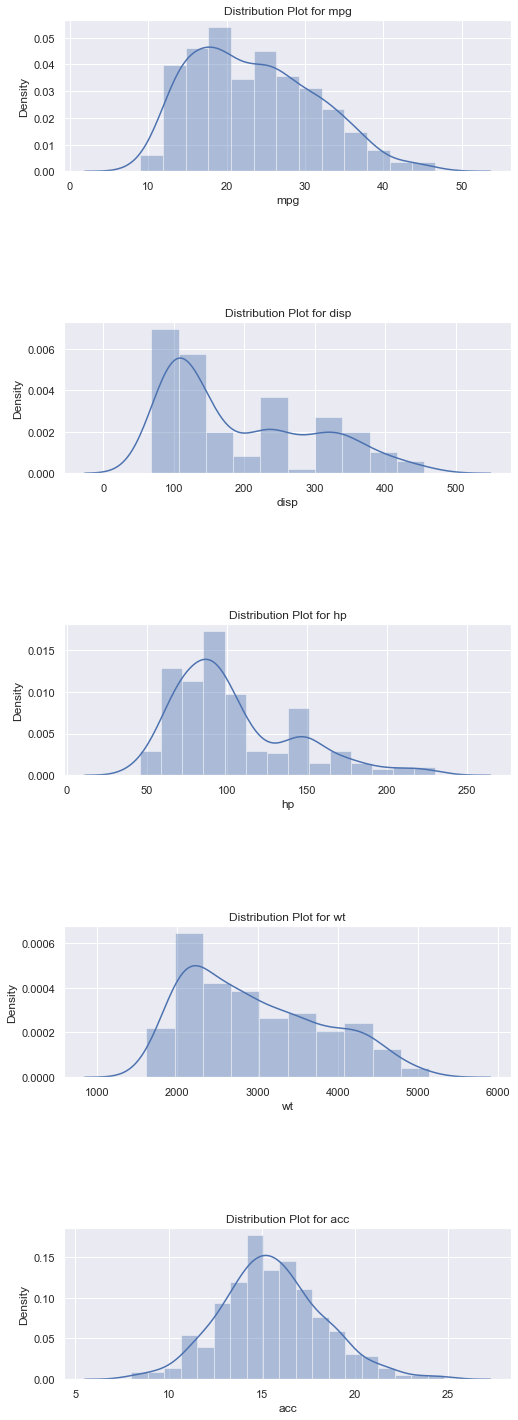

In [22]:
num1 = ['mpg','disp','hp','wt','acc']
fig1,ax1 = plt.subplots(5)
fig1.set_figheight(25)
fig1.set_figwidth(8)
for i,col in enumerate(num1):
    sns.distplot(automobile[col],ax=ax1[i])
    ax1[i].set_title('Distribution Plot for %s'%col)
plt.subplots_adjust(hspace=1)
    
    



**Addition to this we can check for any outliers and conclude using boxplot and IQR**

In [23]:
#Function to find the outliers. It takes the colum as argument and returns the outlier values.
def check_Outlier1(inp1):
    Q_1 = inp1.quantile(0.25)
    Q_3 = inp1.quantile(0.75)
    IQR = Q_3 - Q_1
    print('\nIQR = ',IQR)
    upper_fence = Q_3+(IQR*1.5)
    lower_fence = Q_1-(IQR*1.5)
    print('Upper Fence = ',upper_fence,'\nLower Fence = ',lower_fence)
    outliers = inp1[(inp1>upper_fence) | (inp1<lower_fence)]
    return outliers

**mpg**

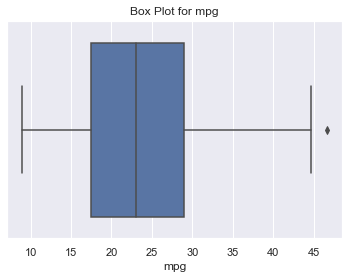

In [24]:
#Boxplot of mpg
sns.boxplot(x='mpg',data = automobile)
plt.title('Box Plot for mpg')
plt.show()

In [25]:
#From above image we can see there is one outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(automobile.mpg)))



IQR =  11.5
Upper Fence =  46.25 
Lower Fence =  0.25

The number of Outliers present =  1


**From distribution plot we can see mpg is kind of normal but there is skewness. That is depicted as outlier in boxplot. Most cars have 20 mpg.**

**disp**

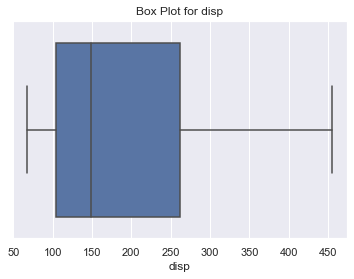

In [26]:
#Boxplot of disp
sns.boxplot(x='disp',data = automobile)
plt.title('Box Plot for disp')
plt.show()

In [27]:
#From above image we can see there is no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(automobile.disp)))



IQR =  157.75
Upper Fence =  498.625 
Lower Fence =  -132.375

The number of Outliers present =  0


**For disp more value is in the 2nd quarter. Most cars have displacement around 100. There are no outliers present**

**hp**

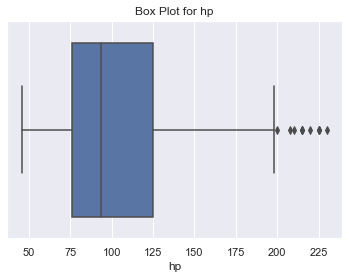

In [28]:
#Boxplot of hp
sns.boxplot(x='hp',data = automobile)
plt.title('Box Plot for hp')
plt.show()

In [29]:
#From above image we can see there is some outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(automobile.hp)))



IQR =  49.0
Upper Fence =  198.5 
Lower Fence =  2.5

The number of Outliers present =  11


**Horsepower have skewness which is result of ouliers.Most cars have around 100 horsepower**

**wt**

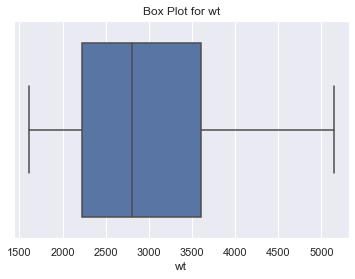

In [30]:
#Boxplot of wt
sns.boxplot(x='wt',data = automobile)
plt.title('Box Plot for wt')
plt.show()

In [31]:
#From above image we can see there is no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(automobile.wt)))



IQR =  1384.25
Upper Fence =  5684.375 
Lower Fence =  147.375

The number of Outliers present =  0


**There are no outliers present.It is kind of normaly distributed. 2000 is the value of weight for most of the cars.**

**acc**

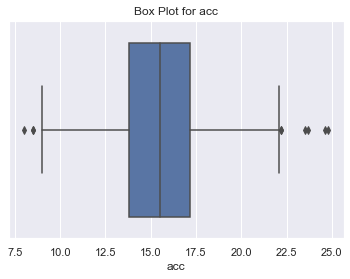

In [32]:
#Boxplot of acc
sns.boxplot(x='acc',data = automobile)
plt.title('Box Plot for acc')
plt.show()

In [33]:
#From above image we can see there is some outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(automobile.acc)))



IQR =  3.349999999999996
Upper Fence =  22.199999999999992 
Lower Fence =  8.800000000000008

The number of Outliers present =  9


**Acceleration is almost normaly distributed but it contains outliers.**

**Countplot of Categorical Data**

<AxesSubplot:xlabel='cyl', ylabel='count'>

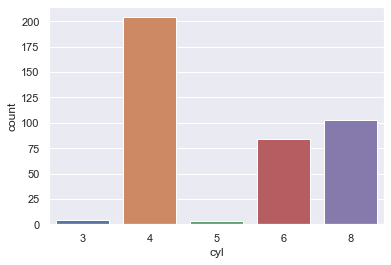

In [34]:
sns.countplot(x='cyl',data=automobile)

4 cylinder cars are the highest followed by 8 cylinder.

<AxesSubplot:xlabel='origin', ylabel='count'>

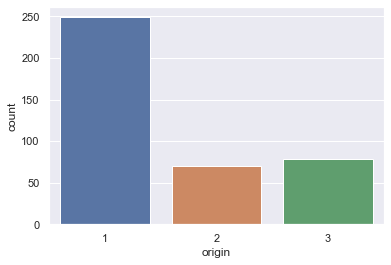

In [35]:
sns.countplot(x='origin',data=automobile)

Origin 1 has the highest number of cars.

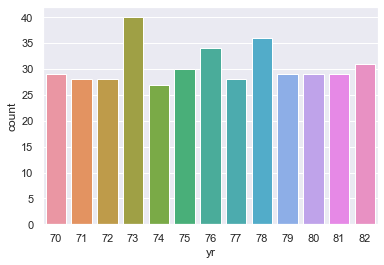

In [36]:
sns.countplot(x='yr',data=automobile);

There is a hike in the year 73. More cars are of 73 model.

<br><br>**Bi Variate Analysis**

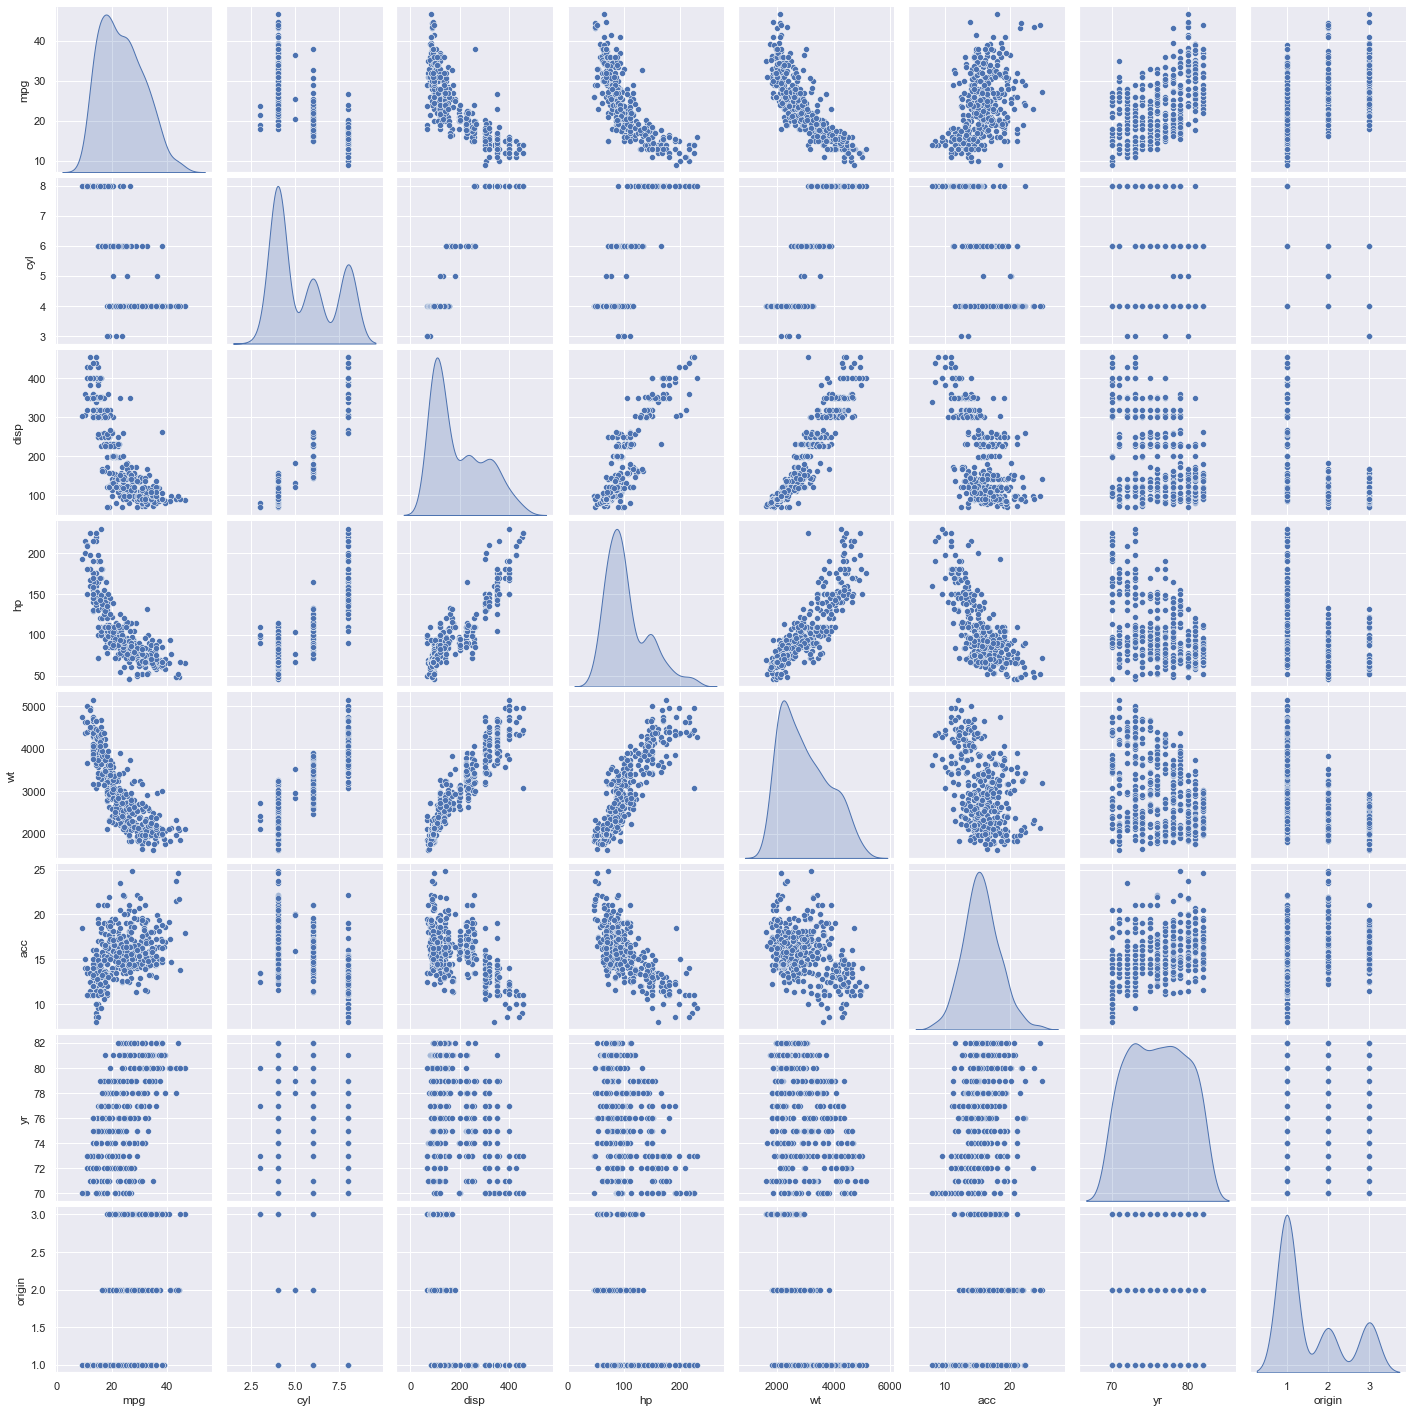

In [37]:
#Pairplot gives a good visualisation between the realtion of each attributes.
sns.pairplot(automobile,diag_kind='kde')

mpg have nearly normal distribution. mpg have negative linear relationship with disp,hp and wt. While relation with acc is kindo of scattered.
<br>
cyl has three peaks in its distribution(clusters).
<br>
disp also has three clusters. The relation with other attributes are not strong except mpg.
<br>
hp has two peaks.
<br>
wt also has two peaks.
<br>
acc has normal distribution. Has no good relation.
<br>
yr has two peaks whereas origin has 3 peaks.

In [38]:
corr1 = automobile.corr()
corr1

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

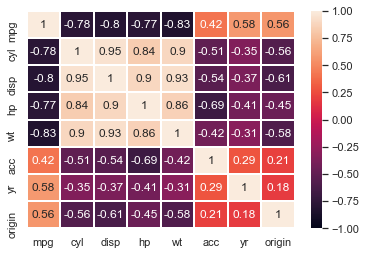

In [39]:
sns.heatmap(corr1,annot=True,vmin=-1,vmax=1,linewidths=1)
#Heat map of correlation

The above shows both numerical and visual representation of the correlation beteween different attributes. Our conclusion from the pairplot can be validated through above steps.

### 4 Machine Learning

In [40]:
#Earlier we have found outliers in our dataset, so we need to remove it before model building
outlier_var = ['mpg','hp','acc'] #Making a list of atributes having outliers

for x in outlier_var:
    print('\n',x,'\n')
    out_r = check_Outlier1(automobile[x])
    
    print('The number of Outliers present in %s before imputing = %d'%(x,len(out_r)))
    Q1,Q3 = automobile[x].quantile(0.25),automobile[x].quantile(0.75)
    I_QR = Q3-Q1
    T = I_QR*1.5 
    lvalue,uvalue = Q1-T,Q3+T
    
    out_auto = automobile.loc[(automobile[x] >=lvalue) & (automobile[x] <= uvalue)]
    median_auto = int(out_auto[x].median())
    print('Median of %s = %f'%(x,median_auto))
    automobile_new[x] = automobile[x] = np.where(automobile[x]>uvalue,median_auto,automobile[x])
    automobile_new[x] = automobile[x] = np.where(automobile[x]<lvalue,median_auto,automobile[x])
    out_final = automobile_new.loc[(automobile_new[x] <lvalue) & (automobile_new[x] > uvalue)]
    print('The number of Outliers present in %s after imputing = %d'%(x,len(out_final)))

    


 mpg 


IQR =  11.5
Upper Fence =  46.25 
Lower Fence =  0.25
The number of Outliers present in mpg before imputing = 1
Median of mpg = 23.000000
The number of Outliers present in mpg after imputing = 0

 hp 


IQR =  49.0
Upper Fence =  198.5 
Lower Fence =  2.5
The number of Outliers present in hp before imputing = 11
Median of hp = 92.000000
The number of Outliers present in hp after imputing = 0

 acc 


IQR =  3.349999999999996
Upper Fence =  22.199999999999992 
Lower Fence =  8.800000000000008
The number of Outliers present in acc before imputing = 9
Median of acc = 15.000000
The number of Outliers present in acc after imputing = 0


**From above we have successfully replaced outliers with median of the corresponding attributes. The updated data is stored in our new cleaned dataframe with dummi variables assigned. Now all we have to do is Normalize all continuos variable using z-score**

In [41]:
automobile_new.iloc[:,:6] = automobile_new.iloc[:,:6].apply(zscore)
automobile_new
#Scaled using zscore

,mpg,cyl,disp,hp,wt,acc,origin__1,origin__2,origin__3
0,-0.706667,1.498191,1.090604,0.880633,0.630870,-1.398581,1,0,0
1,-1.095281,1.498191,1.503514,1.937878,0.854333,-1.598940,1,0,0
2,-0.706667,1.498191,1.196232,1.484773,0.550470,-1.799298,1,0,0
3,-0.965743,1.498191,1.061796,1.484773,0.546923,-1.398581,1,0,0
4,-0.836205,1.498191,1.042591,1.182703,0.565841,-1.999656,1,0,0
...,...,...,...,...,...,...,...,...,...
393,0.459177,-0.856321,-0.513026,-0.448475,-0.213324,0.043998,1,0,0
394,2.661327,-0.856321,-0.925936,-1.475513,-0.993671,-0.196432,0,1,0
395,1.106868,-0.856321,-0.561039,-0.508889,-0.798585,-1.558868,1,0,0
396,0.588715,-0.856321,-0.705077,-0.659924,-0.408411,1.246148,1,0,0


**Creating clusters using K-Means**

We need to find the number of clusters,for that we are performing the knee test or elbow method.

In [42]:
automobile_new_kmean = automobile_new.copy() #Making a copy for only Kmeans clustering
automobile_kmean = automobile.copy()
range_clusters = range(1,15)
error_li = []
for j in range_clusters:
    clusters = KMeans(j,n_init= 5)
    clusters.fit(automobile_new_kmean)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    error_li.append(clusters.inertia_)

cluster_view = pd.DataFrame({'Cluster_no':range_clusters,'Errors':error_li}) 
cluster_view
    

,Cluster_no,Errors
0,1,2602.226131
1,2,1147.917820
2,3,799.281789
3,4,674.502705
4,5,592.462742
5,6,546.092456
6,7,507.911791
7,8,466.932634
8,9,437.999602
9,10,401.901151


Text(0, 0.5, 'Error per cluster')

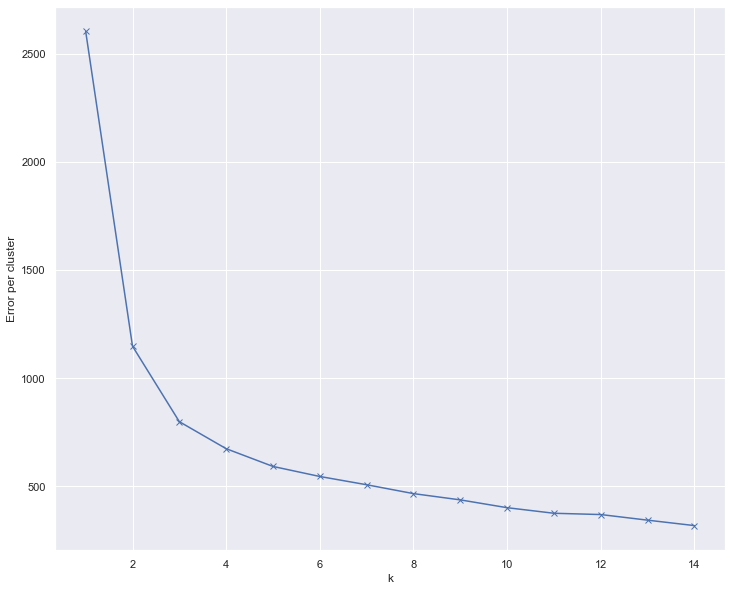

In [43]:
#Now from the above list of errors for each cluster we can plot it in graph to find the elbow
plt.figure(figsize=(12,10))
plt.plot(cluster_view.Cluster_no, cluster_view.Errors,'bx-')
plt.xlabel('k')
plt.ylabel('Error per cluster')

From the above graph we can observe that the line bend at around 4, so we can go for 4 clusters.


In [44]:
kmeans_auto = KMeans(n_clusters=4,n_init=5,random_state=1999)
kmeans_auto.fit(automobile_new_kmean)


KMeans(n_clusters=4, n_init=5, random_state=1999)

Now we have created clusters using KMeans, now lets predict and append to the original dataset and do futher analysis

In [45]:
auto_predict = kmeans_auto.predict(automobile_new_kmean)
automobile_new_kmean['Group'] = auto_predict
automobile_kmean['Group'] = auto_predict
automobile_kmean.head() #Printing the cleaned dataset with each group assigned

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2


In [46]:
#Now lets check the distribution of each group
automobile_kmean.Group.value_counts()

0    124
2     98
3     92
1     84
Name: Group, dtype: int64

In [47]:
auto_group = automobile_new_kmean.groupby(automobile_new_kmean['Group'])
auto_group.mean().T

Group,0,1,2,3
mpg,0.283465,-0.495242,-1.150137,1.295262
cyl,-0.794610,0.355973,1.486178,-0.837126
disp,-0.686453,0.313710,1.476568,-0.934078
hp,-0.345918,-0.043917,1.405865,-0.991216
wt,-0.579574,0.347346,1.381031,-1.007076
acc,-0.086235,0.531060,-1.050203,0.750043
origin__1,0.435484,0.928571,1.000000,0.206522
origin__2,0.330645,0.059524,0.000000,0.260870
origin__3,0.233871,0.011905,0.000000,0.532609


The distribution of Groups looks fine.
<br>

Group 3 has highest mpg and acc while Group 2 has the lowest.
<br>
Group 2 has the highest value for cyl,disp,hp,wt while Group 3 has the lowest. This is a result from correlation, we can observe it heatmap.
<br>
Group 2 might be of origin 1, Group 0 of origin 2, Group 3 of origin 3.


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'origin__1'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'origin__2'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'origin__3'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[Group]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

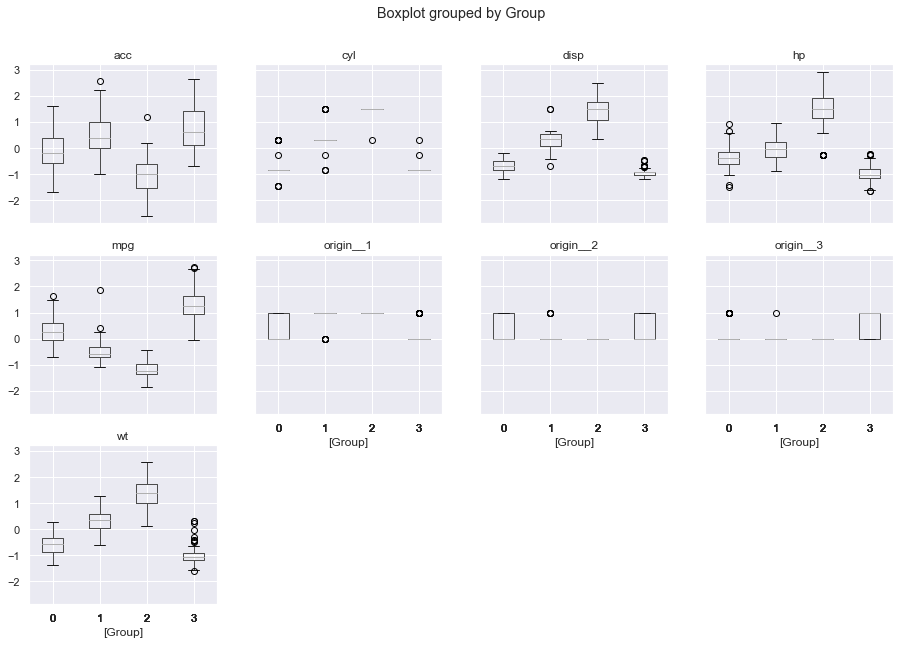

In [48]:
#Now we can visualize the centers using boxplots
automobile_new_kmean.boxplot(by='Group',layout=(3,4),figsize=(15,10))

Group 0 - More number of cars are present in Group 0. It is from origin 2. It has moderate mpg, rest of the values are low.
<br><br>
Group 1 - Have moderate accelaration,displacement,cylinders,horsepower and weight. It is kind of from origin 1.
<br><br>
Group 2 - Has the highest number of cylinders,displacement,horsepower,weight while having lowest milespergallon and accelaration. It is from origin 1.
<br><br>
Group 3 - It have the highest milespergallon and accelaration. Whereas it have the lowest cylinders,displacement,horsepower,weight. From origin 3

In [49]:
#We can export the final dataset for future analysis.
#Exporting the final dataset and storing it on local machine in .csv,.xlsx and .json format
automobile_new_kmean.to_csv(r'automobile_kmean_csv.csv',index=False)
automobile_new_kmean.to_json(r'automobile_kmean_json.json')
automobile_new_kmean.to_excel(r'automobile_kmean_excel.xlsx',index=False)

<br><br><br>**Creating clusters using Hierarchical clustering**

In [50]:
automobile

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,15.0,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [51]:
heirarchy_model = AgglomerativeClustering(n_clusters= 4, affinity='euclidean',linkage='ward') #Taking number of cluster = 4
heirarchy_model.fit(automobile_new)

AgglomerativeClustering(n_clusters=4)

In [52]:
#Appending the group/clusters to the orginal dataset.
automobile_new_heirar = automobile_new.copy()
automobile_heirar = automobile.copy()
automobile_new_heirar['Group'] = heirarchy_model.labels_
automobile_heirar['Group'] = heirarchy_model.labels_

automobile_heirar.head() #Printing the dataset after clustering

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,3


In [53]:
#Now lets look for the distribution of each group
automobile_heirar.Group.value_counts()

0    143
3     97
1     85
2     73
Name: Group, dtype: int64

In [54]:
#Lets check the average for each group
auto_heirar_avg = automobile_new_heirar.groupby(['Group'])
auto_heirar_avg.mean().T

Group,0,1,2,3
mpg,0.554927,0.843677,-0.532944,-1.156311
cyl,-0.736948,-0.828620,0.433823,1.486055
disp,-0.686241,-0.875890,0.391589,1.484507
hp,-0.400841,-0.893762,-0.051439,1.412836
wt,-0.630129,-0.853487,0.384440,1.387534
acc,-0.227256,1.142904,0.521565,-1.059005
origin__1,0.440559,0.188235,1.000000,1.000000
origin__2,0.335664,0.258824,0.000000,0.000000
origin__3,0.223776,0.552941,0.000000,0.000000


Group 0 is of origin2.
<br>
Group 1 has the highest mpg,acc wheras Group 3 has the lowest.
<br>
Group 2  is of origin1
<br>
Group 3 has the highest value for cyl,disp,hp,wt wheras Group 1 has the lowest. Is of the origin1 


In [55]:
#Now we can use cophenetic correlation to measure the success of dendrograms and conclude. 
#It is the euclidean distance of each object and the dendrogramic distance. If the value is higher then the dendrogram is faithful to the data.

L = linkage(automobile_new, metric='euclidean',method = 'average')
c, corr_dist = cophenet(L,pdist(automobile_new))
print("Cophenetic score = ",c)


Cophenetic score =  0.8080913270888344


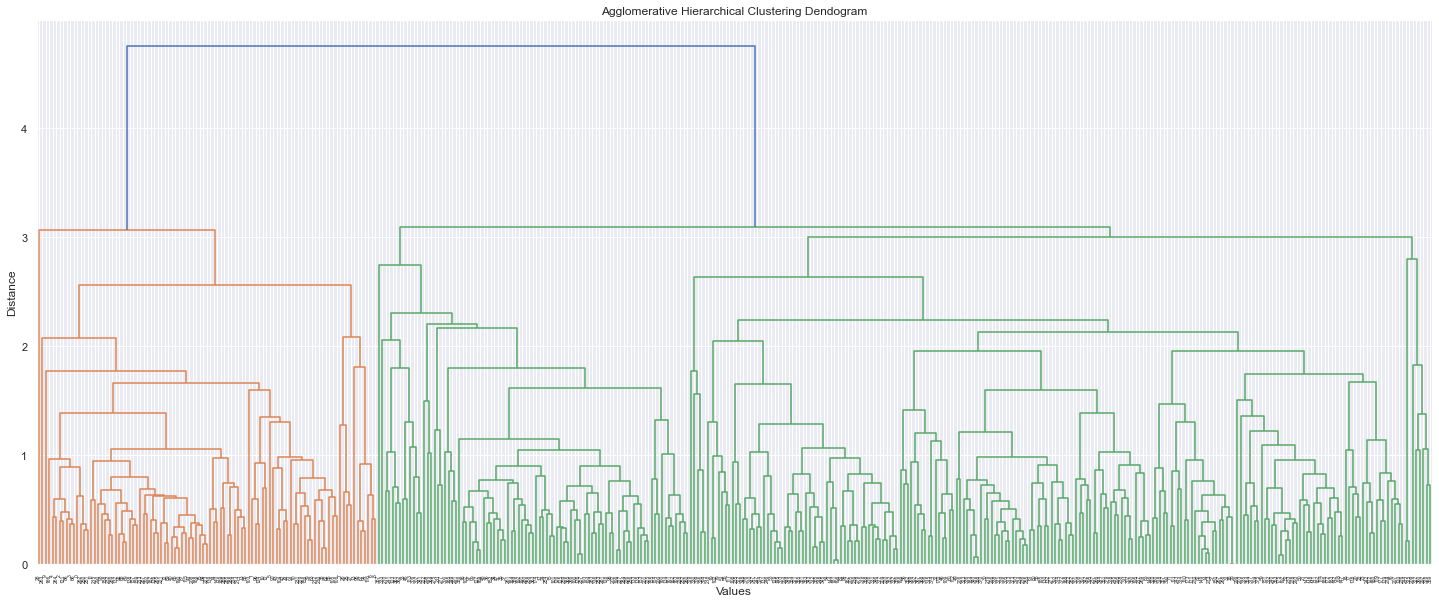

In [56]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Values')
plt.ylabel('Distance')
dendrogram(L )
plt.show()

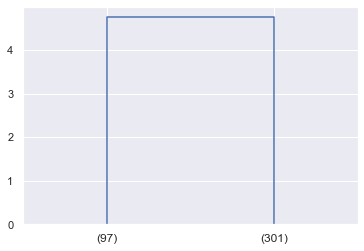

In [57]:
#The above image is difficult to visualize so we plot the final dendrogram function
dendrogram(L,truncate_mode='lastp',p=2)
plt.show()


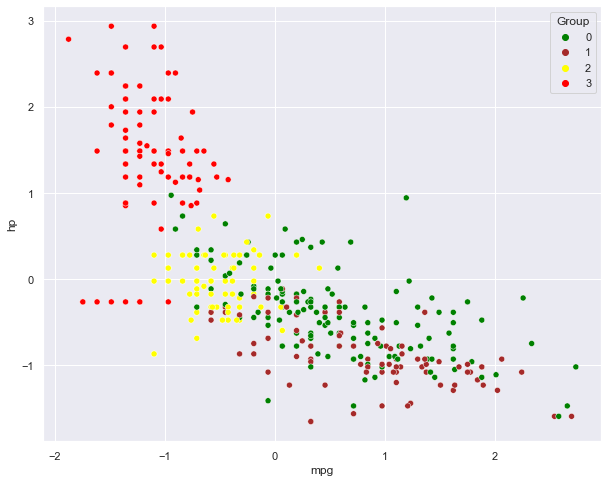

In [58]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="Group",
              data=automobile_new_heirar, 
                    palette=['green','brown','yellow','red']);

From above we can observe the average method is showing good promise to the data.

In [59]:
#Saving the dataset for future analysis
automobile_new_heirar.to_csv(r'automobile_heirar_csv.csv',index=False)
automobile_new_heirar.to_json(r'automobile_heirar_json.json')
automobile_new_heirar.to_excel(r'automobile_heirar_excel.xlsx',index=False)

**From the above two methods of clustering we can observe that there is a challenge to find the proper value for K. The hierarchical method gave us proper valuation on our dendrogram, which we missed in K-Means. Hierarchical is kind of  complex. But we can create clusters as we need using the dendrogram.More information is provided in hierarchical method. In K-means if the elbow is not proper we need to iterate through each K value.**

### <br><br><br><br>  5. ML based methods. 

**Mention how many optimal clusters are present in the data and what could be the possible reason behind it**

**Use linear regression model on different clusters separately and print the coefficients of the models individually**

In [60]:
automobile_new_heirar.head()

,mpg,cyl,disp,hp,wt,acc,origin__1,origin__2,origin__3,Group
0,-0.706667,1.498191,1.090604,0.880633,0.630870,-1.398581,1,0,0,3
1,-1.095281,1.498191,1.503514,1.937878,0.854333,-1.598940,1,0,0,3
2,-0.706667,1.498191,1.196232,1.484773,0.550470,-1.799298,1,0,0,3
3,-0.965743,1.498191,1.061796,1.484773,0.546923,-1.398581,1,0,0,3
4,-0.836205,1.498191,1.042591,1.182703,0.565841,-1.999656,1,0,0,3


In [61]:
#We are going to take Clusters formed from hierarchical method and split them separately based on their groups
LGroup0 = automobile_new_heirar[automobile_new_heirar.Group == 0]
LGroup1 = automobile_new_heirar[automobile_new_heirar.Group == 1]
LGroup2 = automobile_new_heirar[automobile_new_heirar.Group == 2]
LGroup3 = automobile_new_heirar[automobile_new_heirar.Group == 3]


<br>Group 0

In [62]:
#Spliting the Group0 data into train and test
X = LGroup0.drop(columns='mpg')
y = LGroup0['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [63]:
L_model = LinearRegression()
L_model.fit(X_train,y_train)
L_model_predicted = L_model.predict(X_test) #making prediction with the fitted model
print('Accuracy of Training data: ',L_model.score(X_train,y_train))
print('Accuracy of Test data: ',L_model.score(X_test,y_test))

Accuracy of Training data:  0.454003630058454
Accuracy of Test data:  0.30362913112458034


<br>Group 1

In [64]:
#Spliting the Group1 data into train and test
X = LGroup1.drop(columns='mpg')
y = LGroup1['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [65]:
L_model = LinearRegression()
L_model.fit(X_train,y_train)
L_model_predicted = L_model.predict(X_test) #making prediction with the fitted model
print('Accuracy of Training data: ',L_model.score(X_train,y_train))
print('Accuracy of Test data: ',L_model.score(X_test,y_test))

Accuracy of Training data:  0.6475870751324118
Accuracy of Test data:  0.05786402016232772


<br>Group 2

In [66]:
#Spliting the Group2 data into train and test
X = LGroup2.drop(columns='mpg')
y = LGroup2['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [67]:
L_model = LinearRegression()
L_model.fit(X_train,y_train)
L_model_predicted = L_model.predict(X_test) #making prediction with the fitted model
print('Accuracy of Training data: ',L_model.score(X_train,y_train))
print('Accuracy of Test data: ',L_model.score(X_test,y_test))

Accuracy of Training data:  0.29784830599042567
Accuracy of Test data:  0.10099138636402838


<br>Group 3

In [68]:
#Spliting the Group3 data into train and test
X = LGroup3.drop(columns='mpg')
y = LGroup3['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [69]:
L_model = LinearRegression()
L_model.fit(X_train,y_train)
L_model_predicted = L_model.predict(X_test) #making prediction with the fitted model
print('Accuracy of Training data: ',L_model.score(X_train,y_train))
print('Accuracy of Test data: ',L_model.score(X_test,y_test))

Accuracy of Training data:  0.313113039823509
Accuracy of Test data:  0.21687232655011146


**How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using  one  single  model  without clustering? Mention how it impacts performance and prediction.**

The orginal dataset contained huge amount of data which collected by different methods. So there is a high chance of imbalance in data for prediction,
this will affect the performance of our model. But when we group them or cluster them  and then using each of these clusters for prediction can tackle this problem of imbalance.
Since a single dataset is grouped/clustered if the accuracy is low for a certain model we can use different models for each of these clusters. All these can make our calculation correct.

### <br><br> 6.Improvisation:

It would have been better if the date from which this survey was conducted was provided since it would have given insight on the age of each model. The attribute mpg is just vague, if the proper calculation would have given then we could create new attributes.The attribute information states nothing about the unit of each measurement, this could be improved. More data could have been added.

<br><br><br><br><br><br><br><br><br><br>

##  <u>Part Two - PROJECT BASED</u>

• <b>DOMAIN :</b> Manufacturing<br>
• <b>CONTEXT :</b> Company X curates and packages wine across various vineyards spread throughout the country.<br>
• <b>DATA DESCRIPTION :</b> <br>
The data concerns the chemical composition of the wine and its respective quality.<br>
Attribute Information:<br><br>
    1. A, B, C, D: specific chemical composition measure of the wine<br>
    2. Quality: quality of wine [ Low and High ]<br><br>
• <b>PROJECT  OBJECTIVE :</b> Goal is to build a synthetic data generation model using the existing data provided by the company.<br><br>
    Steps and tasks: <br>
        1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

<br><br>

In [70]:
#importing dataset
wine_df = pd.read_excel('Part2 - Company.xlsx')

In [71]:
wine_df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [72]:
#shape and size of the data
print(wine_df.shape)
print(wine_df.size)

(61, 5)
305


In [73]:
#Checking the data type of attributes
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


From above we can see the Quality(target variable) has null values, we need to deal it.

In [74]:
wine_df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

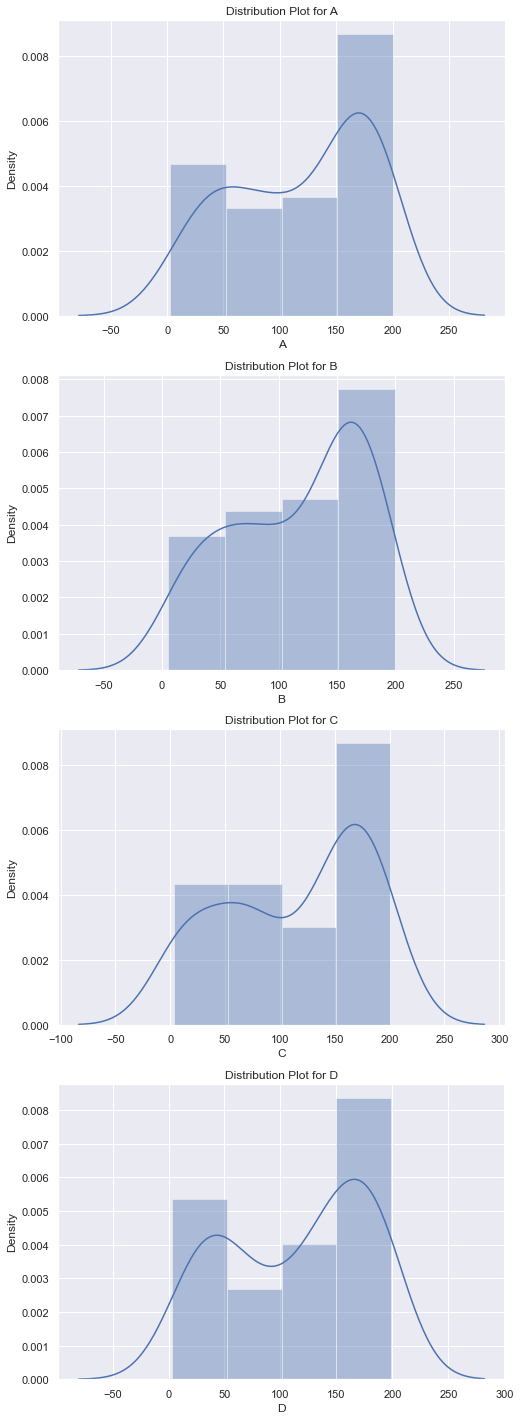

In [75]:
#Our goal is to build a model that can impute the missing values, so firstly we need to analyse the data
num_wine = wine_df.iloc[:,:4]
cat_wine = wine_df.Quality

fig2,ax2 = plt.subplots(4)
fig2.set_figheight(25)
fig2.set_figwidth(8)
for i,col in enumerate(num_wine):
    sns.distplot(num_wine[col],ax=ax2[i])
    ax2[i].set_title('Distribution Plot for %s'%col)


In [76]:
num_wine.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


From the distribution graph and 5 point summary we can see that for every variable the value ranges between near 3 to 200.
The mean and median for each are close enough

In [77]:
#Now check our target, our categorical variable
cat_wine.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [78]:
#To build a model first we have to standardize all the values to make them to a unqiue range.Here we are using zscore for scaling.

num_wine = num_wine.apply(zscore)
num_wine.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [79]:
clus1 = range(1,10)
error2 = []
for k in clus1:
    wine_clus = KMeans(k,n_init=5)
    wine_clus.fit(num_wine)
    wine_labels = wine_clus.labels_
    wine_centroids = wine_clus.cluster_centers_
    error2.append(wine_clus.inertia_)
wine_view = pd.DataFrame({'Clus_no':clus1,'Error':error2})
wine_view

,Clus_no,Error
0,1,244.000000
1,2,45.522552
2,3,38.063713
3,4,33.409114
4,5,29.969877
5,6,25.654319
6,7,22.829673
7,8,19.147686
8,9,18.014206


Text(0, 0.5, 'Error per cluster')

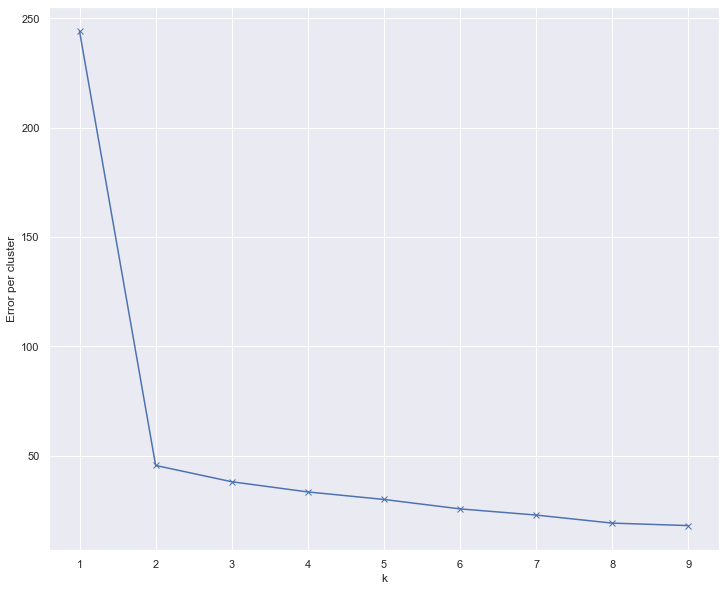

In [80]:
plt.figure(figsize=(12,10))
plt.plot(wine_view.Clus_no, wine_view.Error,'bx-')
plt.xlabel('k')
plt.ylabel('Error per cluster')

With the help of elbow method we can clearly depict the number of clusters as 2

In [81]:
#Creating 2 cluster
kwine_means = KMeans(n_clusters=2)
kwine_means.fit(num_wine)
wlabel = kwine_means.labels_

In [82]:
#Appending the labels to the original dataset
wine_df['Quality_new'] = wlabel
wine_df.head(10)

,A,B,C,D,Quality,Quality_new
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
5,153,140,154,199,NaN,0
6,34,28,78,22,Quality A,1
7,191,144,143,154,NaN,0
8,160,181,194,178,Quality B,0
9,145,178,158,141,NaN,0


In [83]:
#Since our previous column Quality is labeled as Quality A and Quality B we can rename the new labels the same, for the sake of easy understanding
wine_df['Quality_new'] = wine_df.Quality_new.replace({0:'Quality A',1:'Quality B'})
wine_df.head()

,A,B,C,D,Quality,Quality_new
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B


So our goal is to impute the missing values in the Quality attribute. We can do it by comparing it with the predicted value. If any pattern is shown we can replace the missing value with the new value.

In [84]:
#Dropping the null values and keeping the orginal dataset.
wine_drop = wine_df.dropna()
wine_drop.head()

,A,B,C,D,Quality,Quality_new
0,47,27,45,108,Quality A,Quality B
1,174,133,134,166,Quality B,Quality A
3,61,23,3,44,Quality A,Quality B
4,59,60,9,68,Quality A,Quality B
6,34,28,78,22,Quality A,Quality B


In [85]:
wine_drop.shape
#We can see the shape has changed since the null values are dropped

(43, 6)

In [86]:
#Now we need to check the accuracy of the old Quality attribute and predicted Quality (Quality vs Quality_new)
predicted = wine_drop.Quality_new
actual = wine_drop.Quality

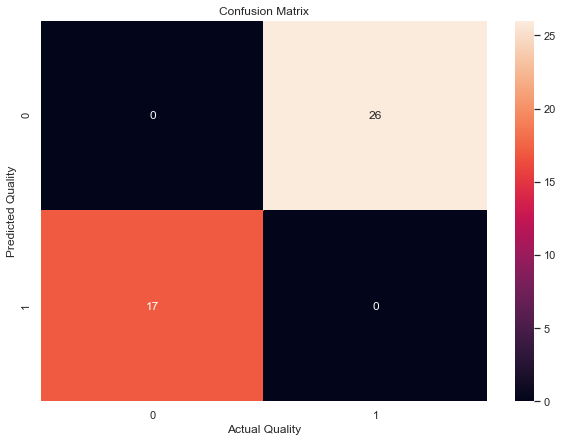

In [87]:
#An easy method for this comparison is with the help of confusion matrix

cm = confusion_matrix(actual,predicted)
plt.figure(figsize= (10 ,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Confusion Matrix');

**From the above we can see the model has correctly predicted the attribute. So we can impute or take the new attribute Quality_new as the target variable**

<br><br><br><br><br><br><br><br><br><br>

##  <u>Part Three - PROJECT BASED</u>

• <b>DOMAIN :</b> Automobile<br><br>
• <b>CONTEXT :</b> The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.<br><br>
• <b>DATA DESCRIPTION :</b> The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.<br><br>
•All the features are numeric i.e. geometric features extracted from the silhouette.<br><br>

• <b>PROJECT  OBJECTIVE :</b> Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.<br><br>

<b>Steps and tasks: </b><br><br>
    1. <b>Data:</b> Import, clean and pre-process the data<br><br>
    2. <b>EDA and visualisation:</b> Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.<br><br>
    <b>For example:</b> Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.<br><br>
    3. <b>Classifier:</b> Design and train a best fit SVM classier using all the data attributes.<br><br>
    4. <b>Dimensional reduction:</b> perform dimensional reduction on the data.<br><br>
    5. <b>Classifier:</b> Design and train a best fit SVM classier using dimensionally reduced attributes.<br><br>
    6. <b>Conclusion:</b> Showcase key pointer on how dimensional reduction helped in this case.<br>

<br><br><br>

In [88]:
#Import the dataset
vehicle_df = pd.read_csv('Part3 - vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [89]:
#Shape and size of dataset
print(vehicle_df.shape)
print(vehicle_df.size)


(846, 19)
16074


In [90]:
vehicle_df.info() #We can check for the datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [91]:
#Number of null values in each column
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

We can see there are a lot of null values are present. Need to deal with it.

In [92]:
#Imputing the null values with median of respective column
for val in vehicle_df.columns:
    if(val != 'class'):
        vehicle_df[val] = vehicle_df[val].fillna(vehicle_df[val].median())


In [93]:
#Since null value is removed we can look for 5 point summary
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


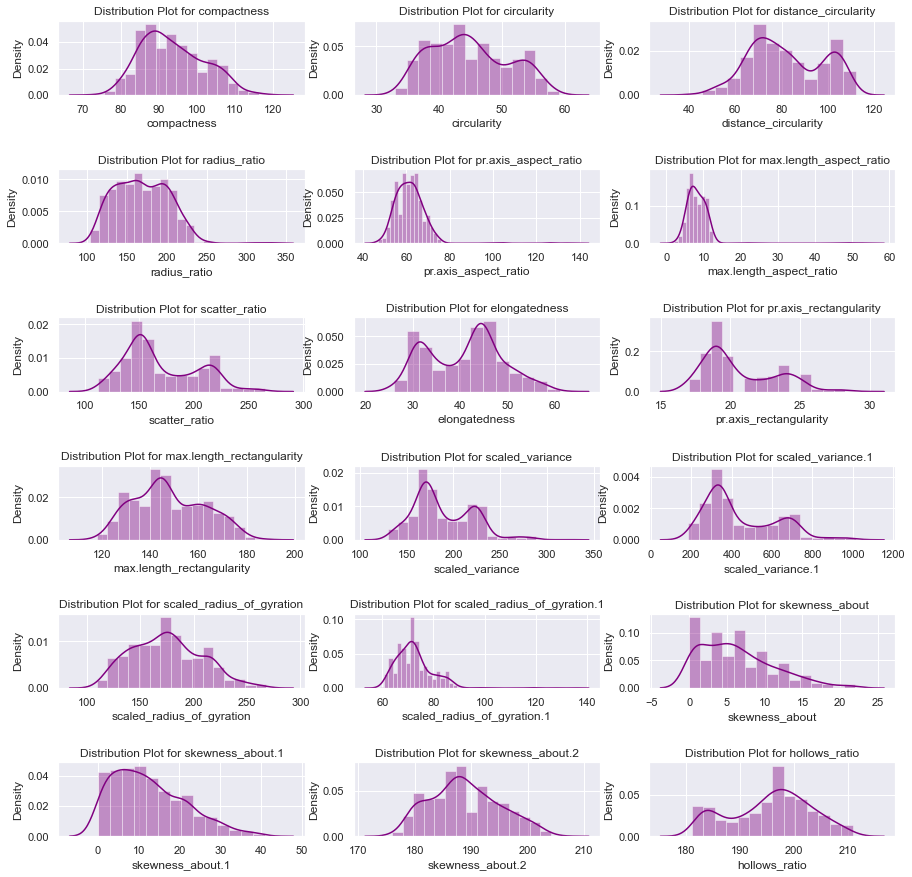

In [94]:
#EDA
#Lets check the distributions of numerical attributes
vehicle_num = vehicle_df.drop(columns='class')
fig3,ax3 = plt.subplots(6,3)
fig3.set_figheight(15)
fig3.set_figwidth(15)
for i,col in  enumerate(vehicle_num.columns):
    sns.distplot(vehicle_df[col],color='Purple',ax=ax3[i//3,i%3])
    ax3[i//3,i%3].set_title('Distribution Plot for %s'%col)
plt.subplots_adjust(hspace=1)

From the 5point summary and visualisation with distribution plot we can say that:
<br>
Many columns distribution are not normal, they have multiple peaks like scatter_ratio,elongatedness,scaled_variance etc.
There is skewness visible in columns skewness_about,skewness_about1. We can observe possibility of outliers in some columns.

In [95]:
#Now Analyse categorical variable
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

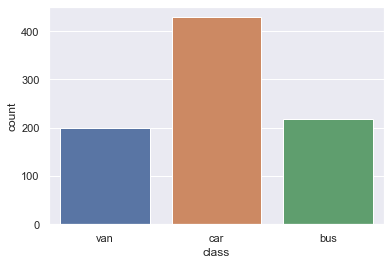

In [96]:
sns.countplot(x='class',data=vehicle_df)

We have highest number of car class followed by bus type.

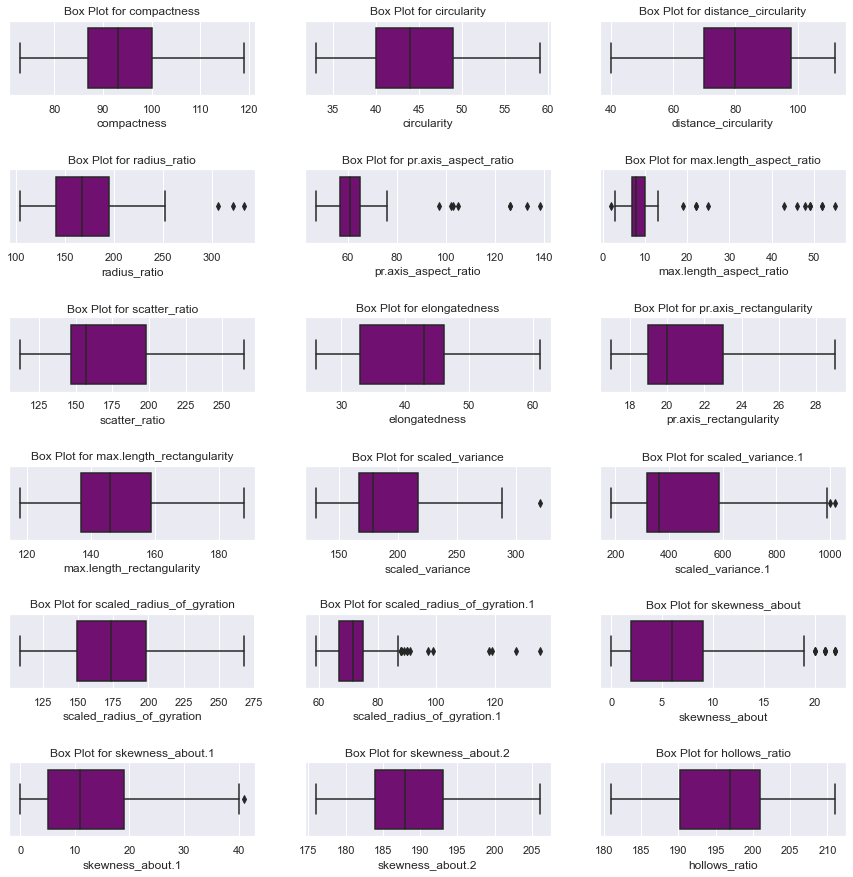

In [97]:
#Lets look for outliers using boxplots


fig4,ax4 = plt.subplots(6,3)
fig4.set_figheight(15)
fig4.set_figwidth(15)
for i,col in  enumerate(vehicle_num.columns):
    sns.boxplot(vehicle_df[col],color='Purple',ax=ax4[i//3,i%3])
   
    ax4[i//3,i%3].set_title('Box Plot for %s'%col)
plt.subplots_adjust(hspace=1)

8 columns have outliers, which needs to be dealt with.

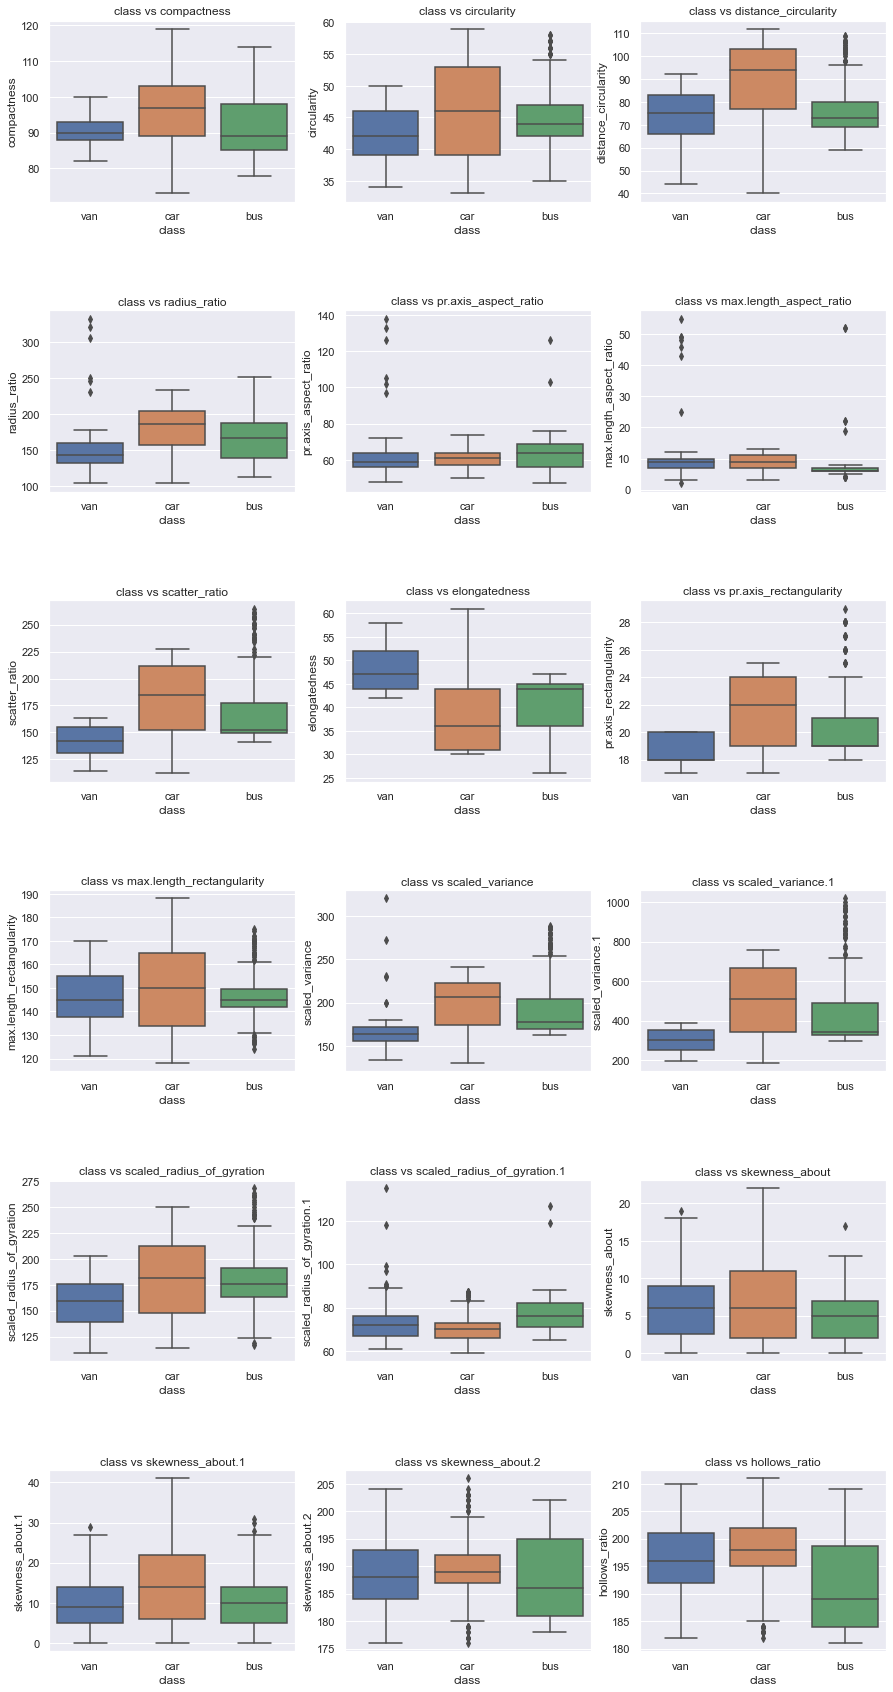

In [98]:
#Lets analyse categorical data with numerical data
fig5,ax5 = plt.subplots(6,3)
fig5.set_figheight(30)
fig5.set_figwidth(15)
for i,col in  enumerate(vehicle_num.columns):
   
    sns.boxplot(x='class',y=col,data=vehicle_df,ax=ax5[i//3,i%3])

   
    ax5[i//3,i%3].set_title('class vs %s'%col)
plt.subplots_adjust(hspace=.6)

Each category varies significantly when compared with numerical data.


In [99]:
#Finding and removing outliers
for col in vehicle_num.columns:
    q1 = vehicle_df[col].quantile(0.25)
    q3 = vehicle_df[col].quantile(0.75)
    iqr = q3 - q1
    lowerq = q1-1.5*iqr
    higherq =  q3+1.5 *iqr
    vehicle_df.loc[(vehicle_df[col] < lowerq) | (vehicle_df[col] > higherq), col] = vehicle_df[col].median()

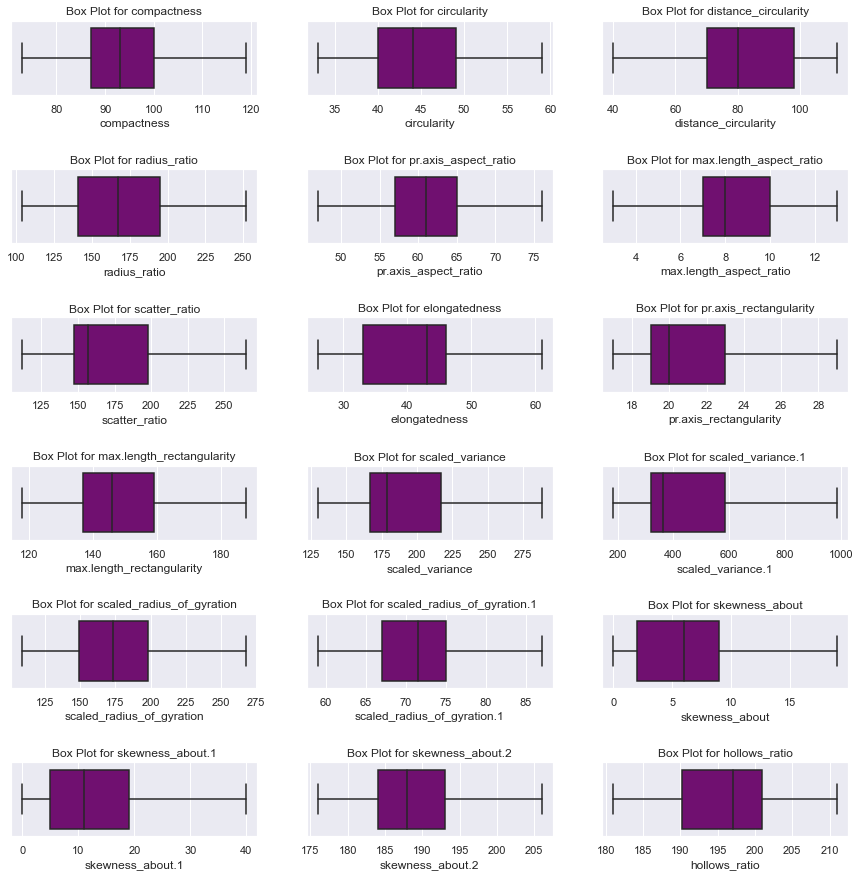

In [100]:
#Checking outliers after removing them
fig4,ax4 = plt.subplots(6,3)
fig4.set_figheight(15)
fig4.set_figwidth(15)
for i,col in  enumerate(vehicle_num.columns):
    sns.boxplot(vehicle_df[col],color='Purple',ax=ax4[i//3,i%3])
   
    ax4[i//3,i%3].set_title('Box Plot for %s'%col)
plt.subplots_adjust(hspace=1)

In [101]:
#Now lets look for correlation
corr2 = vehicle_df.corr()
corr2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770


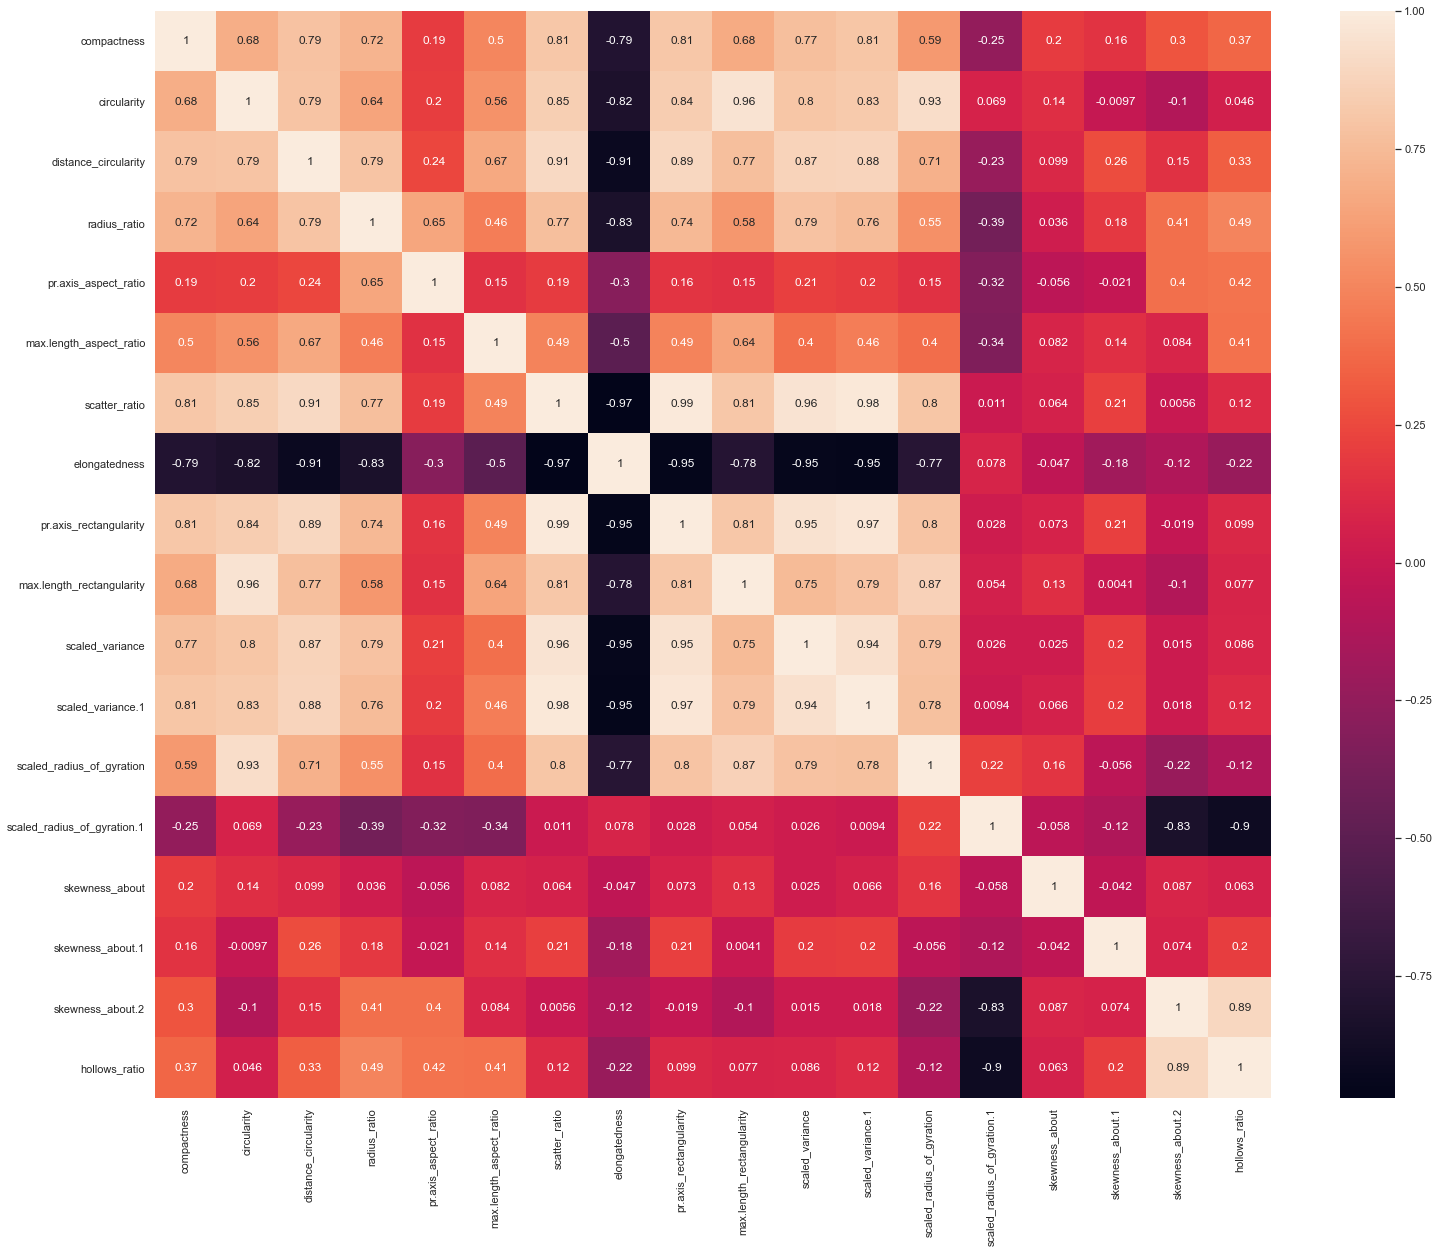

In [102]:
plt.figure(figsize=(25,20))
sns.heatmap(corr2,annot=True);

<br><br>**PCA**

In [103]:
#Before PCA we need to standardize the values.
vehicle_scaled = vehicle_df.drop(columns='class').apply(zscore)
vehicle_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


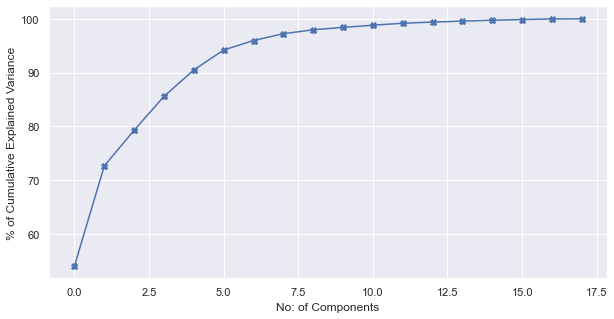

In [104]:
#Now plotting the PCA variance
pca = PCA()
veh_pca = pca.fit_transform(vehicle_scaled)
plt.figure(figsize = (10, 5))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100),marker = 'X')
plt.xlabel('No: of Components')
plt.ylabel('% of Cumulative Explained Variance');

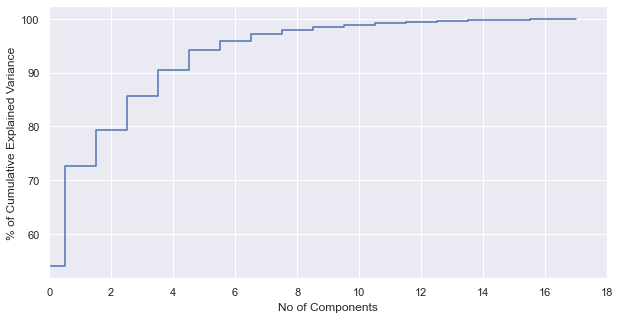

In [105]:
plt.figure(figsize = (10, 5))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('No of Components')
plt.ylabel('% of Cumulative Explained Variance');


What we are trying to do is drop non related components. From the above graph it is evident that almost 95% of variation in data is explained by the first 6 components so we drop the rest.

In [106]:
#Difference btw the original features and reduced features
pca6 = PCA(n_components= 6)
X_pca = pca6.fit_transform(vehicle_scaled)
print('Original = ',vehicle_num.shape[1])
print('Reduced = ',X_pca.shape[1])

Original =  18
Reduced =  6


In [107]:
pca_df = pd.DataFrame(data=X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.584228,-0.675673,-0.453334,-0.750656,-0.777515,-1.848809
1,-1.512180,-0.348934,-0.333436,1.268953,-0.324929,-0.118317
2,3.913448,0.234507,-1.265094,0.137224,0.915751,-0.685594
3,-1.535193,-3.044413,-0.469623,0.324317,-0.611590,0.367777
4,-0.642062,1.488882,-0.246288,-0.550939,0.471655,-1.012698


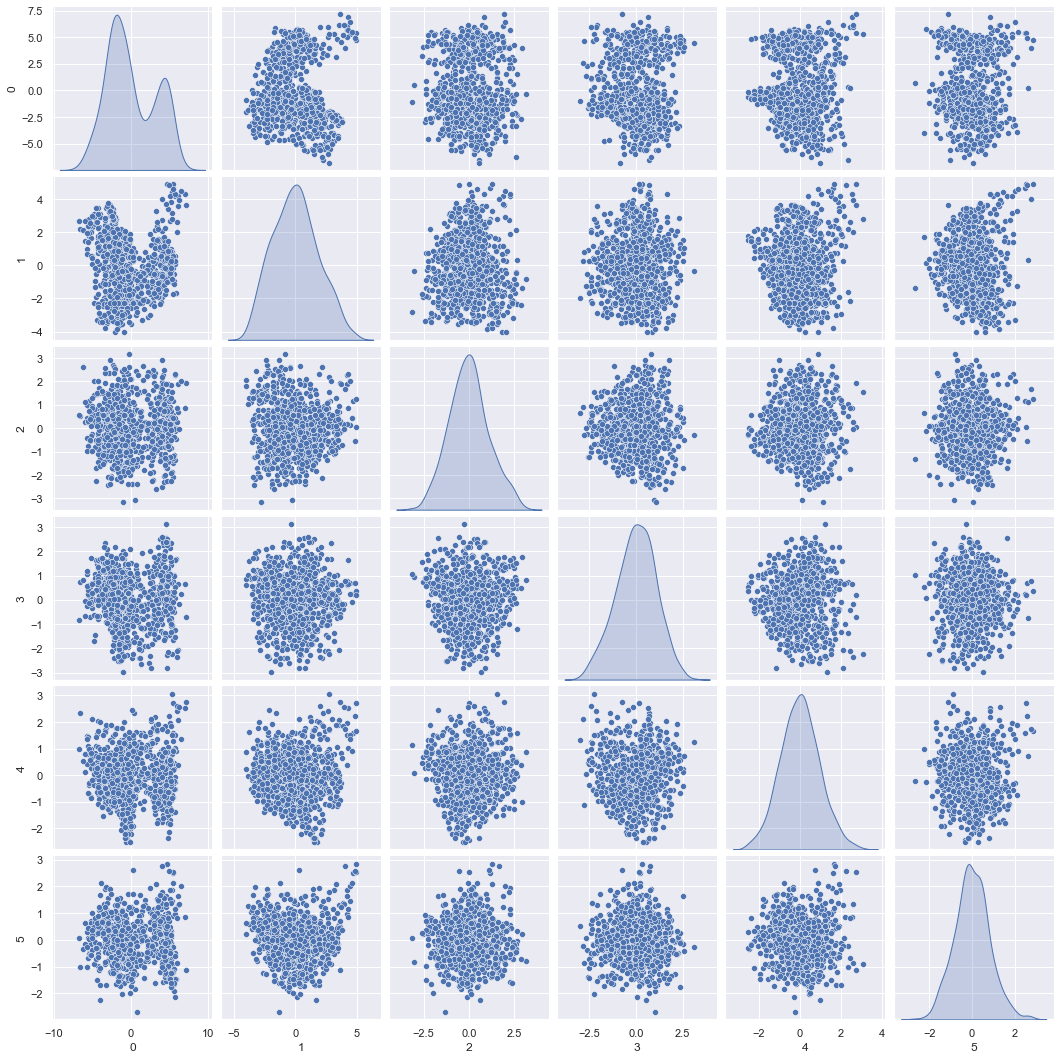

In [108]:
#Now after the reduction we can look the relation
sns.pairplot(pca_df,diag_kind='kde')

We can see the distribution become normal

<br><br><br><br>

**SVM**

In [109]:
#We need to split the data into test train
y = vehicle_df['class']
X_train2 , X_test2, y_train2, y_test2 = train_test_split(vehicle_scaled,y,test_size = 0.3,random_state =10)

print('Shape of training data',X_train2.shape)
print('Shape of test data',X_test2.shape)

Shape of training data (592, 18)
Shape of test data (254, 18)


In [110]:
#Now we have to split the reduced data or PCA data
X_ptrain,X_ptest , y_ptrain,y_ptest = train_test_split(X_pca,y,test_size = 0.3,random_state = 10)
print('Shape of PCA training data',X_ptrain.shape)
print('Shape of PCA test data',X_ptest.shape)

Shape of PCA training data (592, 6)
Shape of PCA test data (254, 6)


In [111]:
#Building SVM model 
sv_model = SVC(C=4,kernel='rbf',gamma='scale')
sv_model.fit(X_train2,y_train2)

SVC(C=4)

In [112]:
#Predicting

sv_train_predict = sv_model.predict(X_train2)
sv_test_predict = sv_model.predict(X_test2)
print('Accuracy of train data :{0:.4f}'.format(metrics.accuracy_score(y_train2, sv_train_predict)))
print('Accuracy of test data :{0:.4f}'.format(metrics.accuracy_score(y_test2, sv_test_predict)))


Accuracy of train data :0.9899
Accuracy of test data :0.9685


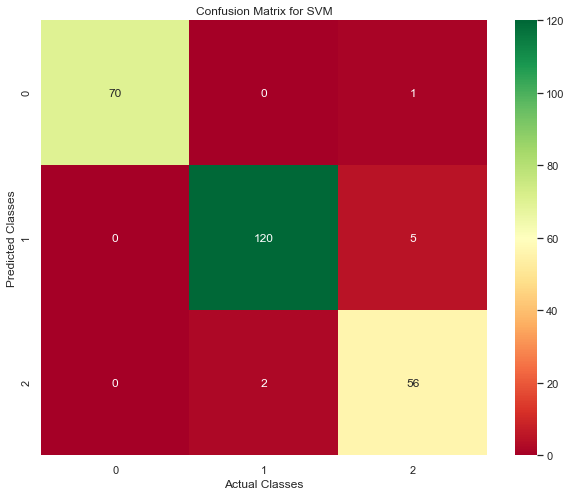

In [113]:
#visualization using confusion matrix 
cm = confusion_matrix(y_test2, sv_test_predict)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.title('Confusion Matrix for SVM');

In [114]:
#printing classification report
print("Classification Report")
print(classification_report(y_test2, sv_test_predict))

Classification Report
              precision    recall  f1-score   support

         bus       1.00      0.99      0.99        71
         car       0.98      0.96      0.97       125
         van       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [115]:
#Now svm on pca data
sv_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
sv_model_pca.fit(X_ptrain, y_ptrain)

SVC(C=4)

In [116]:
#Predicting

sv_ptrain_predict = sv_model_pca.predict(X_ptrain)
sv_ptest_predict = sv_model_pca.predict(X_ptest)
print('Accuracy of PCA train data :{0:.4f}'.format(metrics.accuracy_score(y_ptrain, sv_ptrain_predict)))
print('Accuracy of PCA test data :{0:.4f}'.format(metrics.accuracy_score(y_ptest, sv_ptest_predict)))


Accuracy of PCA train data :0.9476
Accuracy of PCA test data :0.9213


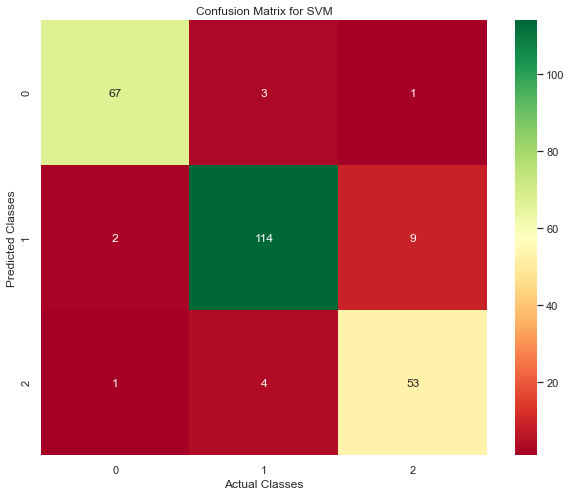

In [117]:
#visualization using confusion matrix 
cm = confusion_matrix(y_ptest, sv_ptest_predict)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.title('Confusion Matrix for SVM');

In [118]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_ptest, sv_ptest_predict))

Classification Report
              precision    recall  f1-score   support

         bus       0.96      0.94      0.95        71
         car       0.94      0.91      0.93       125
         van       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



<br><br>From all the above calculation we have observed that both model gave more than 90%accuracy on test data. But the difference is that with the reduced attributes in PCA we got accuracy above 90% wheras without PCA we used all the attributes to get the accuracy. <br>
More description about the data points collected could have been given so that EDA would have been made simpler.

<br><br><br><br><br><br><br><br><br><br>

##  <u>Part Four - PROJECT BASED</u>

• <b>DOMAIN :</b> Sports managemen<br><br>
• <b>CONTEXT :</b> Company X is a sports management company for international cricket.<br><br>
• <b>DATA DESCRIPTION :</b> The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: <br><br>
    1.Runs: Runs score by the batsman<br><br>
    2.Ave: Average runs scored by the batsman per match<br><br>
    3.SR: strike rate of the batsman<br><br>
    4.Fours: number of boundary/four scored<br><br>
    5.Six: number of boundary/six scored<br><br>
    6.HF: number of half centuries scored so far<br><br>
• <b>PROJECT  OBJECTIVE :</b> Goal is to build a data driven batsman ranking model for the sports management company to make business decisions<br><br>

<b>Steps and tasks: </b><br><br>
    1. <b>EDA and visualisation::</b> Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.<br><br>
    2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.<br>

<br><br><br>

In [119]:
ipl_df = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
ipl_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


just by visualising the data we can observe there is lot of null values. We need to impute or remove it.

In [120]:
print(ipl_df.shape)
print(ipl_df.size)

(180, 7)
1260


In [121]:
ipl_df.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [122]:
#Each attribute have half the number of attributes are missing. Imputing this much data is hard, so it is better to remove it.
ipl_df=ipl_df.dropna(axis=0)
ipl_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [123]:
ipl_df.shape #The number of columns reduced by half after dropping the columns

(90, 7)

In [124]:
ipl_df.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [125]:
#Data types seems to be ok. Lets look for the 5 point summary
ipl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


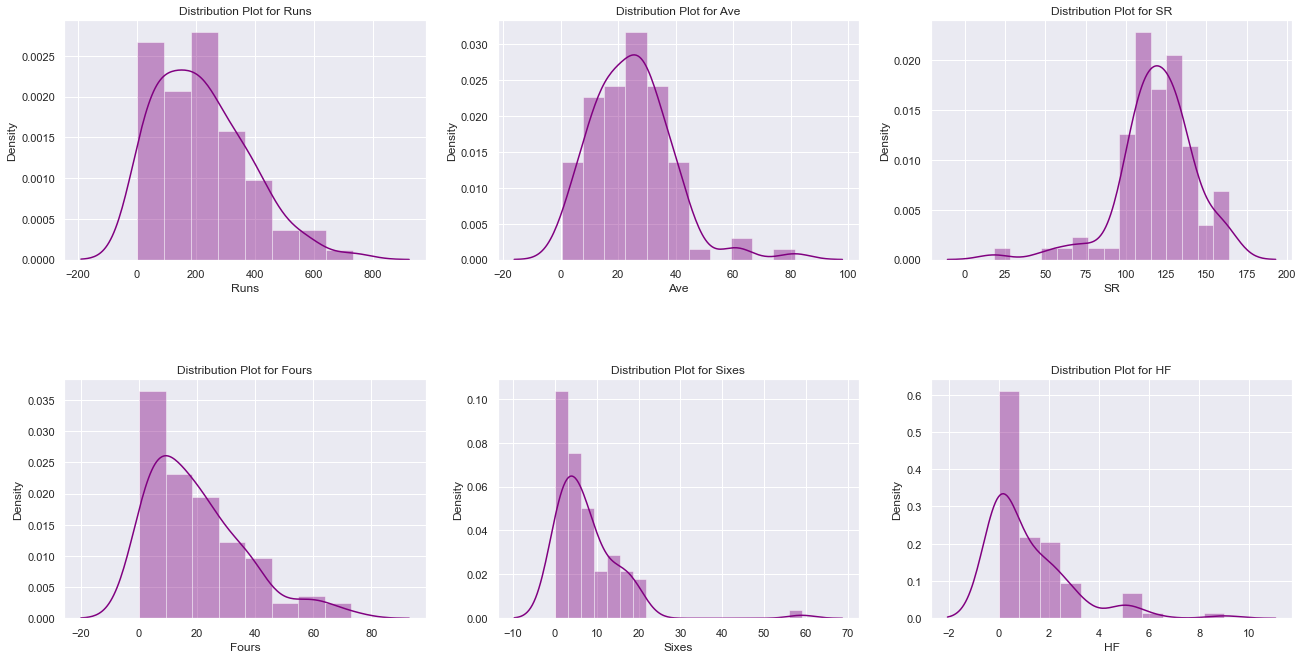

In [126]:
#Now lets lets visualize the numerical data and conclude
#EDA
#Lets check the distributions of numerical attributes
ipl_num = ipl_df.drop(columns='Name')
ipl_cat = ipl_df['Name']
fig6,ax6 = plt.subplots(2,3)
fig6.set_figheight(11)
fig6.set_figwidth(22)
for i,col in  enumerate(ipl_num.columns):
    sns.distplot(ipl_num[col],color='Purple',ax=ax6[i//3,i%3])
    ax6[i//3,i%3].set_title('Distribution Plot for %s'%col)
plt.subplots_adjust(hspace=.5)

We can observe skewness in almost all distribution, it is strong in columns SR,fours,sixes,HF. The column Fours,Sixes,HF value range starts from 0. There is chance for extreme values in the distribution.

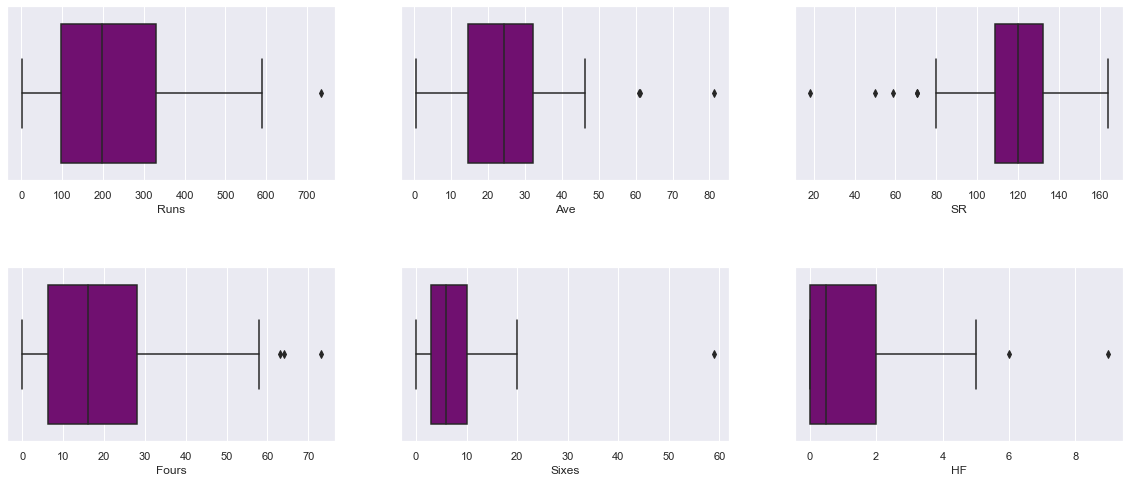

In [127]:
#Lets look for outliers using boxplots
fig7,ax7 = plt.subplots(2,3)
fig7.set_figheight(8)
fig7.set_figwidth(20)
for i,col in  enumerate(ipl_num.columns):
    sns.boxplot(ipl_num[col],color='Purple',ax=ax7[i//3,i%3])
   
    ax4[i//3,i%3].set_title('Box Plot for %s'%col)
plt.subplots_adjust(hspace=.5)

From above we can observe outliers in almost all attributes, we cant completely say these are outliers because we need to take it into subject on what kind of dataset we are using. From the 5point summary we can see Runs column has max value as 733 but its 75% of value is covered upto 330. Here we will think it is outlier, but the attribute is Runs, the value can happen, this must not be by mistake.So we cant remove them or impute them as it will affect our model.

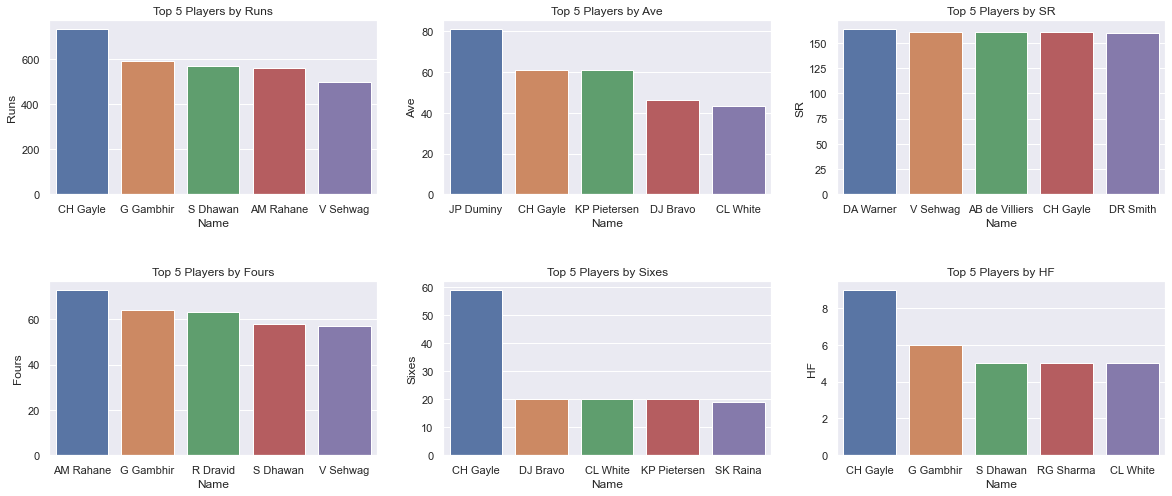

In [128]:
#Now we can even look into individual records just like in cricket scoreboard.
fig8,ax8 = plt.subplots(2,3)
fig8.set_figheight(8)
fig8.set_figwidth(20)
for i,col in  enumerate(ipl_num.columns):
    top = ipl_df.groupby('Name')[col].sum().sort_values(ascending =False).head()
    top = top.reset_index()
    top.columns = ['Name' ,col]
    sns.barplot(data = top, x='Name',y= col,ax=ax8[i//3,i%3]);
    ax8[i//3,i%3].set_title("Top 5 Players by %s"%col);
    

plt.subplots_adjust(hspace=.5)

From above we can see player CH Gayle is performing top in Runs,Six,HF columns. The player is also in top 5 in 4out of 5 columns.

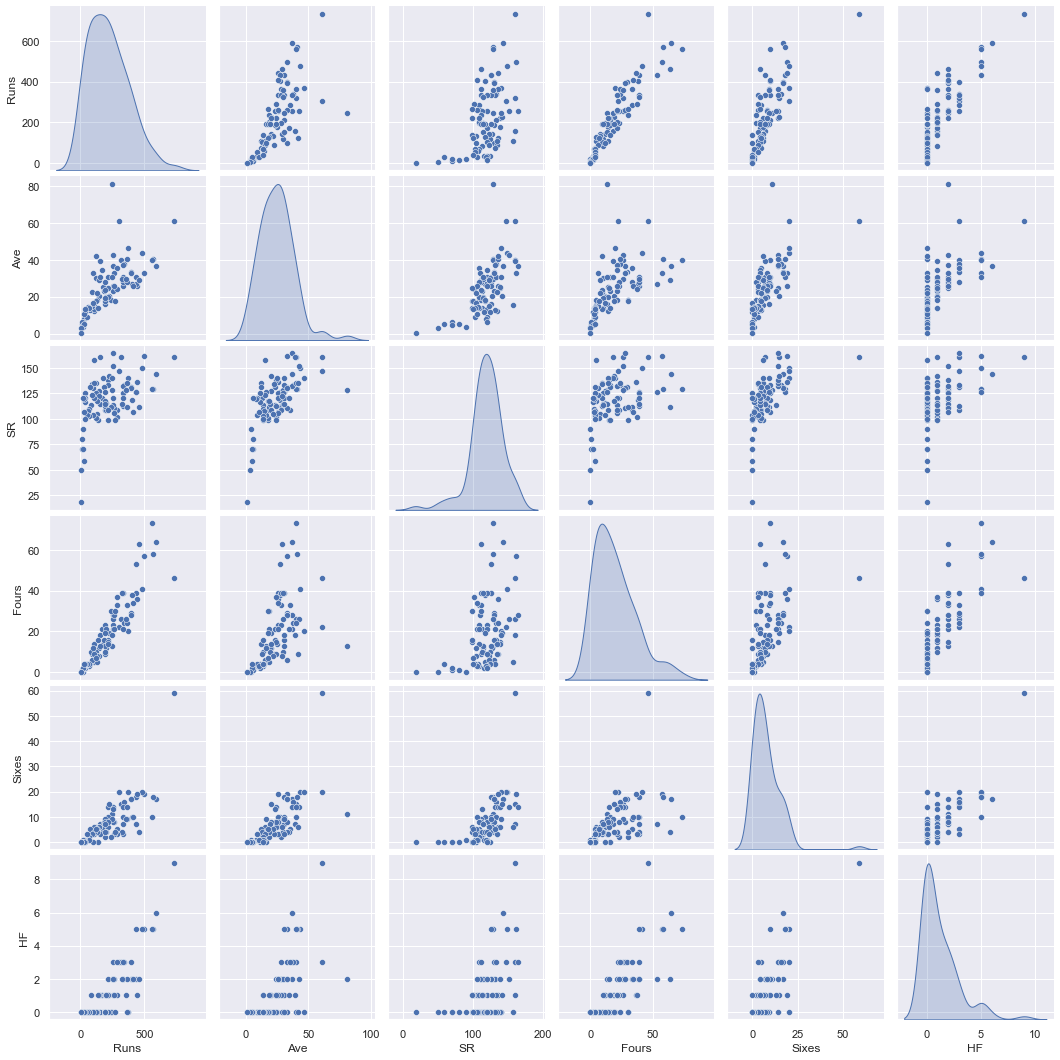

In [129]:
#Now lets look for relation between numerical variables.
sns.pairplot(ipl_df,diag_kind='kde');

In [130]:
#Checking numerical correlation
ipl_cor =ipl_num.corr()
ipl_cor

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


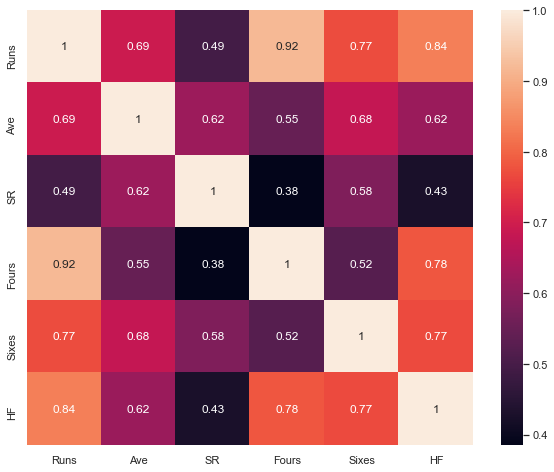

In [131]:
#visualizing corr using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ipl_cor,annot=True);

We can observe Run  have good positive relation with Fours,Sixes and HF. Ave,SR column doesn't have any good relation. Column Fours,Sixes  has small positive relation with HF.


In [132]:
#EDA is complete now we have to scale our numerical var befor building model

ipl_scaled = ipl_num.apply(zscore)
ipl_scaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


Our goal is to build a data driven model to rank all the players in the dataset using all or the most important performance features. So we need to cluster the data.

In [133]:
#We are clustering using K-Means, for that we need to find the good K value.We use elbow method for this.
ipl_error=[]
ipl_range = range(1,5)
for i in ipl_range:
    ipl_KMeans = KMeans(n_clusters=i)
    ipl_KMeans.fit(ipl_scaled)
    ipl_error.append(ipl_KMeans.inertia_)
ipl_view = pd.DataFrame({'Cluster_no':ipl_range,'Errors':ipl_error})  
ipl_view

,Cluster_no,Errors
0,1,540.000000
1,2,296.261354
2,3,223.365185
3,4,178.175080


Text(0, 0.5, 'Error per cluster')

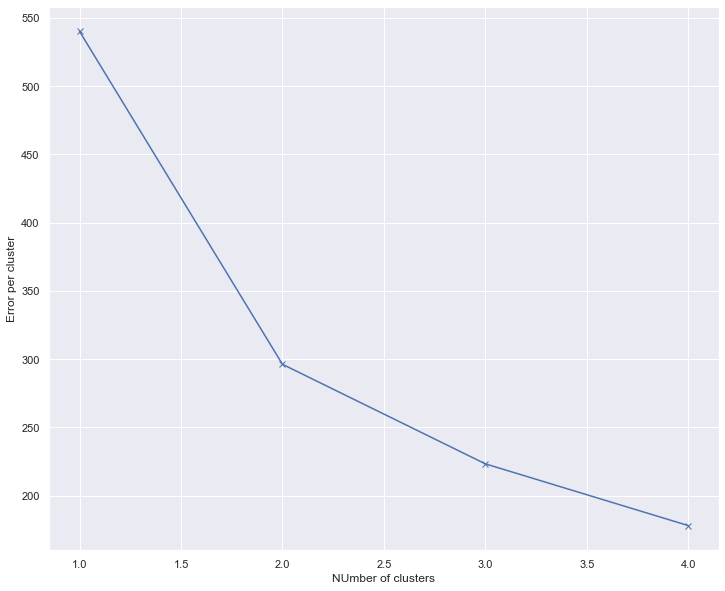

In [134]:
#Plotting and observe the elbow
plt.figure(figsize=(12,10))
plt.plot(ipl_view.Cluster_no, ipl_view.Errors,'bx-')
plt.xlabel('NUmber of clusters')
plt.ylabel('Error per cluster')

We can clearly observe the elbow at value 2. So we choose 2 centroids/clusters for out model.

In [135]:
#using 2 clusters
ipl_means = KMeans(n_clusters=2)
ipl_means.fit(ipl_scaled)
ipl_labels = ipl_means.labels_

In [136]:
#Appending cluster to our original dataset
ipl_df['Group'] = ipl_labels
ipl_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Group
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [137]:
#Checking the distribution of clusters
ipl_df.Group.value_counts()

0    55
1    35
Name: Group, dtype: int64

In [138]:
ipl_df.groupby('Group').mean()

,Runs,Ave,SR,Fours,Sixes,HF
Group,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286


Eventhough Group 1 has less values it is performing or have good mean value for all attributes. So clearly Group 1 is out performing.

In [139]:
#We can rename the Group column value
ipl_df['Group'] = ipl_df['Group'].replace({1: 'Best', 0: 'Moderate'})

In [140]:
#Best Players
ipl_df[ipl_df.Group == 'Best'].head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Group
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Best
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Best
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Best
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Best
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Best


In [141]:
#Moderate Players
ipl_df[ipl_df.Group == 'Moderate'].head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Group
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Moderate
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Moderate
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Moderate
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Moderate
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Moderate


<br><br><br><br><br><br><br><br><br><br>

##  <u>Part Five - PROJECT BASED</u>

• <b>Questions:  :</b> <br><br>
    1. List down all possible dimensionality reduction techniques that can be implemented using python.<br><br>
    2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.<br><br>
    

<br><br><br>

**There are many Dimensionality reduction techniques. We can list them as:**

1) Missing Value Ratio: We use different models for our process. These model is not able to process raw data, we need to clean it, so while cleaning we may observe there are missing values present, we can either impute these missing values with many techniques. But if the missing values are over a certain threshold it will be difficult to impute so it will be better to remove it.<br>

2) Low Variance filter: In certain dataset some attributes may have very low variance or no change at all. They may be constant values throughout the dataset. Low variance variables will not affect the model by default, so it is safe to remove the Low Variance variables.

3) High Correlation filter: Our objective is to reduce number of dimension for reducing complexity and improve accuracy of model, what will be the need of two variable that depict the same meaning? It will hinder model performance, increasing multicollinearity. So it is better to remove highly correlated variables, but care must be taken to keep in mind the domain.

4) Random Forest: This is the most used and inbuilt function for dimensionality reduction. We dont need to code extra for finding whether a variable is important or not.

5) Backward Feature Analysis: This is nothing but using certain number of variables for building a model and checks the accuracy of the model. Then we alter attributes used for the model building and check the accuracy. Likewise we will use different combination to get optimal model. This time computaional and used less

6) Principal Component Analysis: It is used for linear data, what it does is extract new variables from the existing variables called Principal Components.

7) UMAP: This technique works well for high dimensional data. Its run-time is shorter.

8) ISOMAP: We use this technique when the data is strongly non-linear.


<br><br><br>

Yes it is possible to use dimensionality reduction on multimedia data.

In [142]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [143]:
#the above  is a 3 dimensional array dataset of 1797 items with 8x8 as shape
#Contain images each with 8x8 as their size

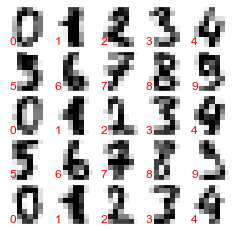

In [144]:
fig_img,ax_img = plt.subplots(5,5,figsize=(4,4),subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1) )

for i,im in enumerate(ax_img.flat):
    im.imshow(digits.images[i],cmap='binary')
    im.text(0.05,0.05, str(digits.target[i]),transform = im.transAxes, color = 'red')

Above we visualize first 50 images with there target

In [145]:
X_img = digits.data
X_img.shape

(1797, 64)

In [146]:
y_img = digits.target
y_img.shape

(1797,)

In [147]:
X_flat = np.array(X_img).reshape((1797, 64)) #flatening the image

In [148]:
X_imtrain, X_imtest, y_imtrain, y_imtest = train_test_split(X_flat, y_img, test_size=0.3, random_state=42)

In [149]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_imtrain, y_imtrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [150]:
y_pred = clf.predict(X_imtest)
print("Accuracy = "+str(accuracy_score(y_imtest,y_pred)))

Accuracy = 0.9648148148148148


In [151]:
pca_dims = PCA()
pca_dims.fit(X_imtrain)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.97) + 1
d

34

In [152]:
pca_final = PCA(n_components=d)
X_reduced = pca_final.fit_transform(X_imtrain)
X_recovered = pca_final.inverse_transform(X_reduced)

In [153]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1257, 34)
recovered shape: (1257, 64)


In [154]:
#We have retained the shape of the data